# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортируем все библиотеки, которые понадобятся в работе
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')
display(data.head(15)) # выведем первые 15 строк таблицы для ознакомления

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Если знаешь как это сделать, то дай знать. Делал всё, как расписано в теории.

In [3]:
data.info() # посмотрим основную информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

Есть столбцы в которых много пропусков. К примеру, в столбце 'is_apartment' заполнено только 2775 строк из 23666. Множество "числовых" столбцов имеют строчный тип. 

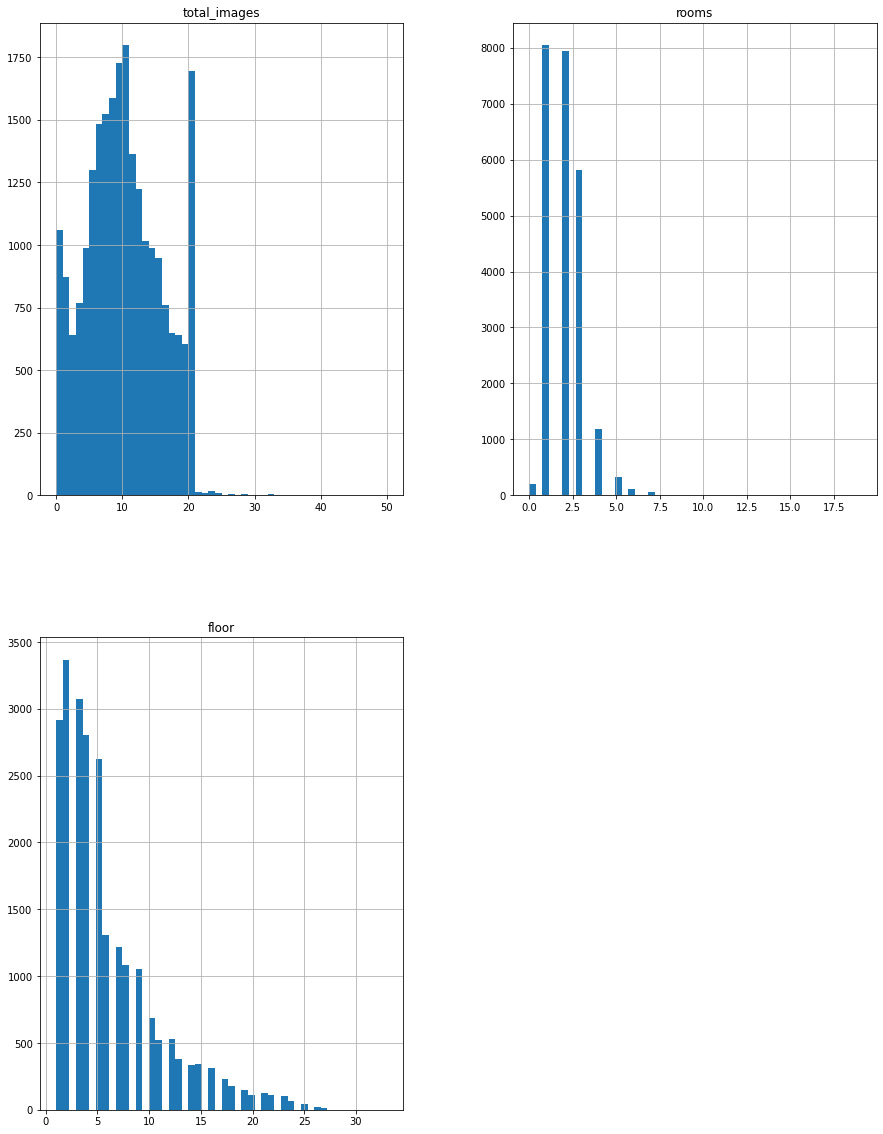

In [4]:
data.hist(bins=50, figsize=(15, 20)); # построим гистограммы по данным

In [5]:
data.describe() # посмотрим на численное описание

,total_images,rooms,floor
count,23699.000000,23699.000000,23699.000000
mean,9.858475,2.070636,5.892358
std,5.682529,1.078405,4.885249
min,0.000000,0.000000,1.000000
25%,6.000000,1.000000,2.000000
50%,9.000000,2.000000,4.000000
75%,14.000000,3.000000,8.000000
max,50.000000,19.000000,33.000000


Все данные три столбца не имеюют пропусков в данных.
Гистограмма столбца 'total_images' выглядит довольно таки странным, потому как кроме "основного" пика имеет еще два. Получается что есть не малое количество объявлений без фотографий, что уже вызывает у меня подозрение. Продавать без рекламы, коим являются фотографии самого объекта продажи, как минимум подозрительно. Но на сколько это взаимосвязано с задачей " Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность." - пока трудно судить, просто запомним. И так же есть пик ровно на 20 фотографиях. Максимальное значение 50 фотографий на объявление, что явно отбивается от основной массы данных, кто то видимо увлекся с фотосессией, но проинципиально ли это при нашем исследовании? Стоит ли избавляться от подобных выбросов? По-моему нет, потому что не вижу здесь экономической составляющей. Вряд-ли цена будет зависеть от количества фото. 

Столбец "rooms", показывающий количество комнат: 
- минимальное значение 0 комнат, предполагаю, что речь идет о студиях, но надо будет перепроверить со столбцом 'studio'. Если никак не взаимосвязаны, то наверное необходимо избавлятся;
- медиана проходит по значению 2 комнаты, что вполне правдоподобно;
- третья квартилья имеет занчение 3 комнаты, что тоже правдоподобно;
- а вот максимальное значение, из-за чего гистограмма сплюснута влево проходит по значению в 19 комнат. Что явно означает выброс. 
Количество комнат явно будет влиять на цену, поэтому в данном столбце необходимо избавляться от подобных проявлений в данных.
По гистограмме видно, что проявления на графике заканчиваются на значении 7 комнат. Всё что больше 7 необходимо будет отбросить. 

Столбец 'floor' выглядет вполне логичным и правдоподобным. Минимум на 1 и максимум 33, думаю, что не стоит его трогать. 

In [6]:
# избавимся от квартир с комнатами больше 7
data.drop(index=data.query('rooms>7').index, inplace=True)
# посмотрим на сколько совпадают столбцы 'rooms' равный 0 и 'studio'. 
data.query('rooms == 0').pivot_table(index='studio', values='total_images', aggfunc='count')

,total_images
studio,
False,59
True,138


Совпадение всего лишь чуть более чем на 2/3. Не знаю как люди заполняли данный столбец, обязателен он или нет, если нет, то какое значение ставится "автоматически". 
Посмотрим на данный срез.

In [7]:
data.query('rooms==0').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.0,2017-03-30T00:00:00,0,NaN,24.0,15.5,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00000000000003
349,4,2320000.0,25.0,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.4,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.0,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.1,2017-12-01T00:00:00,0,2.75,25.0,17.5,21,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.0,2017-06-07T00:00:00,0,2.7,9.0,12.0,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
780,9,2600000.0,26.1,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,NaN,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
839,14,1900000.0,35.0,2017-04-14T00:00:00,0,2.7,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000.0,23.0,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0


В срезе есть одна объединяющая особенность. В столбце площадь кухни 'kithen_area' у всех значения NaN. В студиях как раз таки кухня совмещена со спальней. Посмотрим на срез под этим углом.  

In [8]:
data.query('rooms == 0').pivot_table(index='kitchen_area', values='total_images', aggfunc='count')

""
kitchen_area


Все значения в столбце равны NaN. Делаю вывод, что в столбце с количеством комнат равных 0 речь идёт о студиях, поэтому не буду удалять эти данные.

### Предобработка данных

#### Проверка на наличие явных дубликатов

In [9]:
data.duplicated().sum() #посмотрим на наличие явных дубликатов

0

Повторяющихся строк не выявлено.

####  Проверка на наличие пропусков

In [10]:
data.isna().sum() # посмотрим на наличие пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9186
floors_total               86
living_area              1902
floor                       0
is_apartment            20894
studio                      0
open_plan                   0
kitchen_area             2274
balcony                 11499
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15615
ponds_around3000         5518
ponds_nearest           14575
days_exposition          3174
dtype: int64

Огромное количество пропусков, работы не початый край)

In [11]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

#### Изменение типов данных

Переведем столбцы, где это возможно в вещественные(перевод в int  "целочисленных" столбцов не возможен из-за наличия в них значений NaN), для возможности оперировать ими, а также даты.

In [13]:
data['last_price'] = data['last_price'].astype('float')
data['total_area'] = data['total_area'].astype('float')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['ceiling_height'] = data['ceiling_height'].astype('float')
data['floors_total'] = data['floors_total'].astype('float')
data['living_area'] = data['living_area'].astype('float')
data['kitchen_area'] = data['kitchen_area'].astype('float')
data['balcony'] = data['balcony'].apply(pd.to_numeric)
data['airports_nearest'] = data['airports_nearest'].astype('float')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float')
data['parks_around3000'] = data['parks_around3000'].astype('float')
data['parks_nearest'] = data['parks_nearest'].astype('float')
data['ponds_around3000'] = data['ponds_around3000'].astype('float')
data['ponds_nearest'] = data['ponds_nearest'].astype('float')
data['days_exposition'] = data['days_exposition'].astype('float')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23668 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23668 non-null  int64         
 1   last_price            23668 non-null  float64       
 2   total_area            23668 non-null  float64       
 3   first_day_exposition  23668 non-null  datetime64[ns]
 4   rooms                 23668 non-null  int64         
 5   ceiling_height        14482 non-null  float64       
 6   floors_total          23582 non-null  float64       
 7   living_area           21766 non-null  float64       
 8   floor                 23668 non-null  int64         
 9   is_apartment          2774 non-null   object        
 10  studio                23668 non-null  bool          
 11  open_plan             23668 non-null  bool          
 12  kitchen_area          21394 non-null  float64       
 13  balcony         

#### Обработка пропусков и удаление аномальных значений

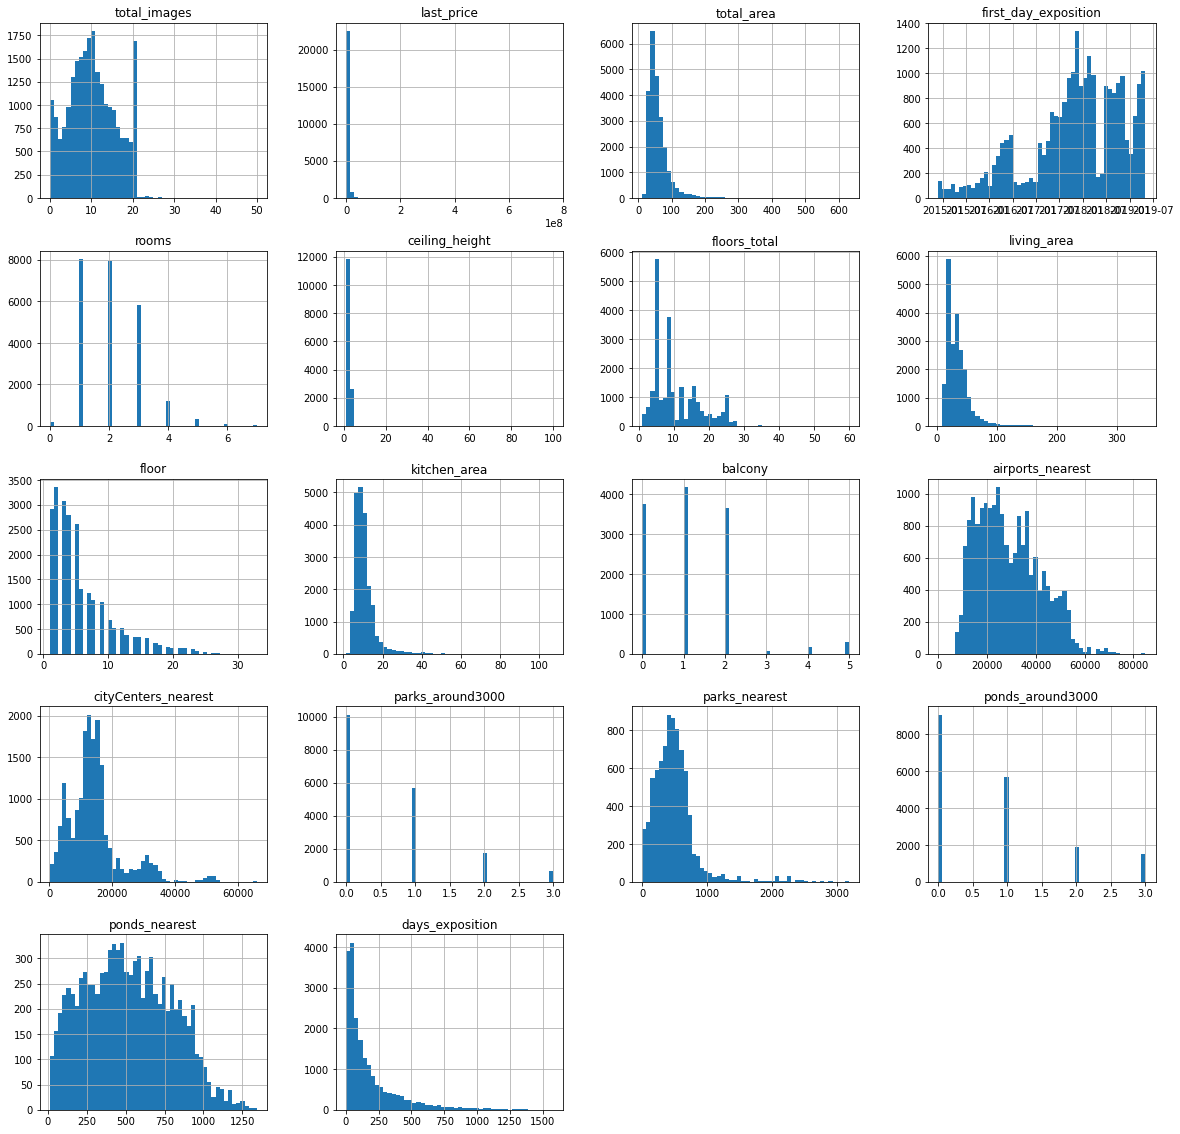

In [15]:
data.hist(bins=50, figsize=(20, 20)); # построим снова гистограммы после изменения типов

In [16]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23668.000000,2.366800e+04,23668.000000,23668.000000,14482.000000,23582.000000,21766.000000,23668.000000,21394.000000,12169.000000,18126.000000,18149.000000,18150.000000,8053.000000,18150.000000,9093.000000,20494.000000
mean,9.859726,6.482333e+06,60.028079,2.060250,2.770800,10.680095,34.240069,5.894330,10.546305,1.150793,28802.995807,14204.204584,0.609972,490.880045,0.769752,518.221929,180.653069
std,5.682707,1.040578e+07,34.194886,1.035396,1.261818,6.597854,21.092693,4.885665,5.806951,1.071426,12636.347140,8606.323134,0.801054,342.359723,0.937956,277.747514,219.399966
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.512500,5.000000,18.600000,2.000000,7.000000,0.000000,18579.000000,9252.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.640000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26752.000000,13107.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.755720e+06,69.602500,3.000000,2.800000,16.000000,42.200000,8.000000,12.000000,2.000000,37287.000000,16296.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,631.200000,7.000000,100.000000,60.000000,347.500000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Судя по гистограммам, многие графики "приплюснуты" влево, что говорит о наличии выбросов в данных. Необходимо разбираться с каждым столбцом по отдельности. 
Начнём с 'last_price'.
Минимальная цена 12000! Уже можно вылетать в Питер и покупать!) Но врядли цена соответствует действительности, явный выброс. Чтобы разобраться, необходимо рассмотреть гистограмму в области минималок, но для начала избавимся от максимальных выбросов, который соответствует 763 млн, врядли сможем. Взглянем на гистграмму еще раз в большом масштабе. 

#####  Столбец lasr_price

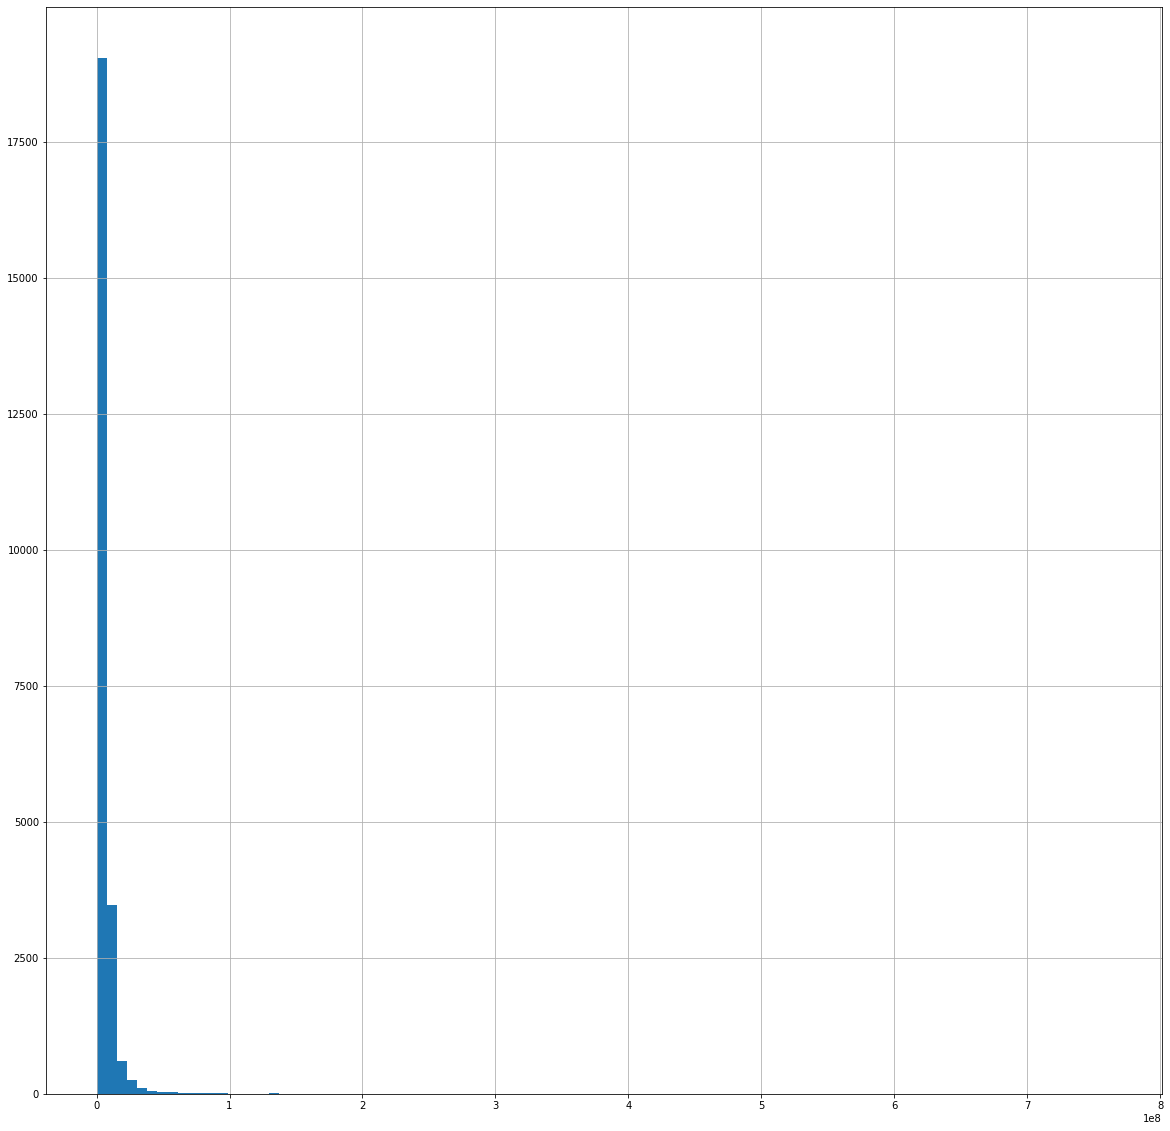

In [17]:
data['last_price'].hist(bins=100, figsize=(20, 20));

По гистограмме видно прерывание данных на значении цен около 100 млн. Все что выше, считаю вбросами, поэтому удалю их. После удаления посмотрю, что творится с минимальными значениями.

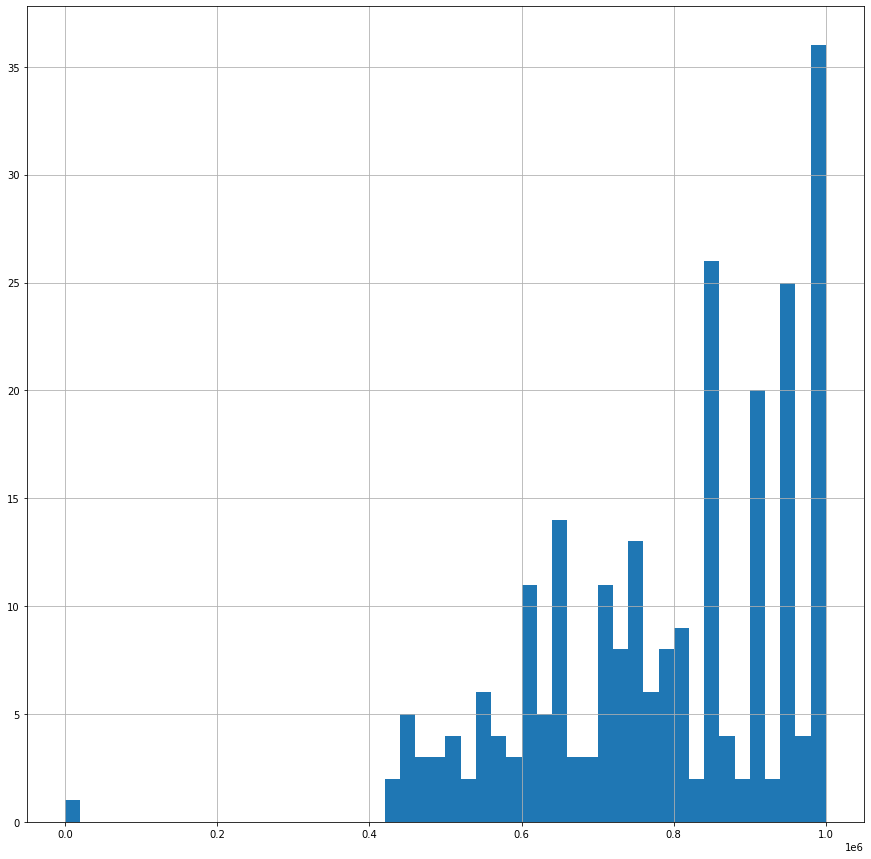

In [18]:
data.drop(index=data.query('last_price > 100000000').index, inplace=True) # убераю все что по цене выше 100000000
data['last_price'].hist(bins=50, figsize=(15,15), range=(0, 1000000)); # построю гистограмму с диапазоном до 1 млн.

По гистограмме видно, что цены начинаются с чуть больше 400000. Все что до этого явно ошибка. Удалим их, но сначала взглянем.

In [19]:
data[data['last_price'] < 400000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


1 строка. Судя по всему забыли добавить нули. А сколько их добавить не известно, поэтому удаляем. 

In [20]:
data.drop(index=data.query('last_price < 400000').index, inplace=True)

##### Столбец total_area



Теперь столбец 'total_area'. Рассмотрим его.

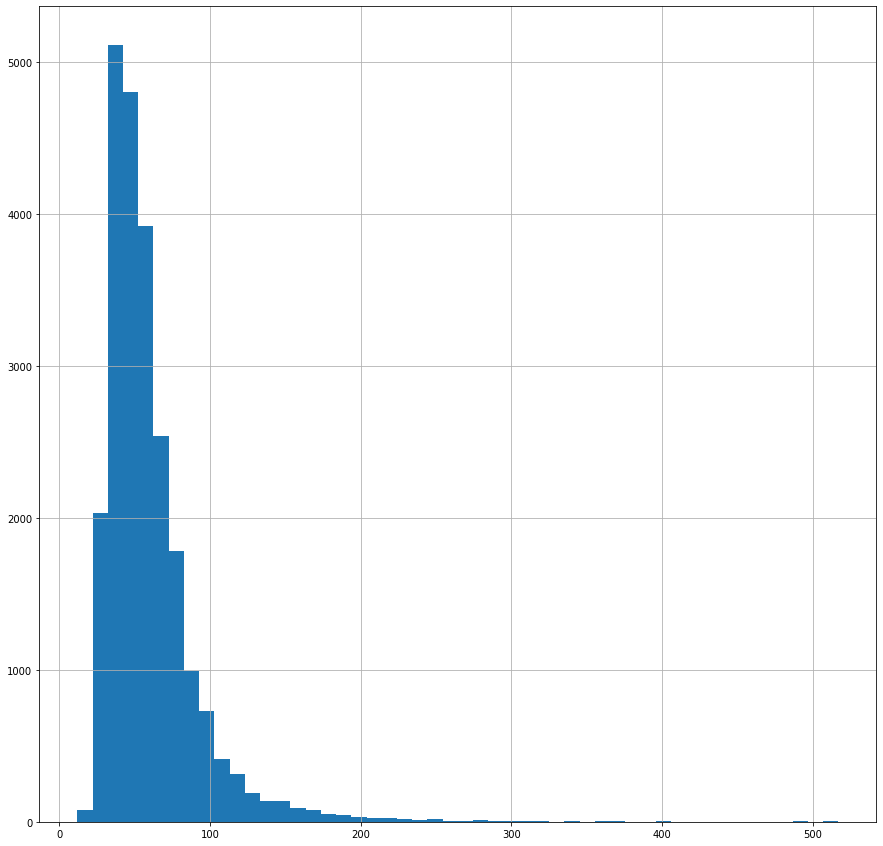

In [21]:
data['total_area'].hist(bins=50, figsize=(15,15));

In [22]:
data['total_area'].describe()

count    23633.000000
mean        59.659264
std         32.437756
min         12.000000
25%         40.000000
50%         52.000000
75%         69.400000
max        517.000000
Name: total_area, dtype: float64

Минимальное значение 12 м2, вполне реальное правдоподобное. Медиана и среднее близки друг другу, что говорит о не большом количестве выбросов. По гистограмме с района около 250 данных уже почти не видно. Считаю необходимым избавится от данных превышающих данное значение. 

In [23]:
data.drop(index=data.query('total_area > 250').index, inplace=True)

#####  Столбец ceiling_height

Следующий столбец 'ceiling_height', который имеет пропуски. Посмотрим на ее гистограмму и на числовое описание данных.

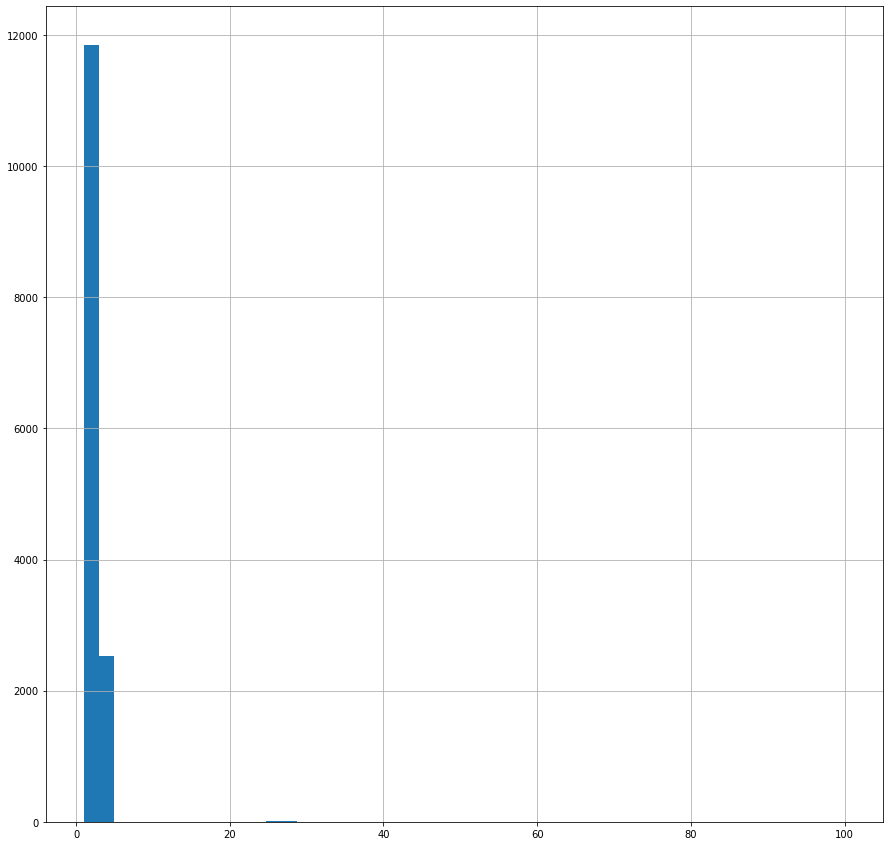

In [24]:
data['ceiling_height'].hist(bins=50, figsize=(15,15));

In [25]:
data['ceiling_height'].describe()

count    14408.000000
mean         2.766895
std          1.262916
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Минимальное значение равен 1 м, а максимальное 100 метров. Это явно не корректные данные. Высота потолков явно не должно быть меньше 2.5-х метров и больше 5. По гистограмме и вовсе ничего не понятно из-за подобных выбросов. Посмотрим сколько строк занимают данные выходящие за 5-ти метровую высоту. 

In [26]:

data.query('ceiling_height >= 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
1053,13,550000.0,29.0,2018-02-01,1,5.0,3.0,NaN,1,False,...,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


Итого 33 строки выбивающиеся за эти значения. Как и указывалось в инструкции по выполнению проекта, в некоторых значениях судя по всему сдвинута запятая. Помножим те значения, которые выбиваются на 0,1.

In [27]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] <= 5, data['ceiling_height']*0.1) 
data.drop(index=data.query('ceiling_height > 5').index, inplace=True) # удалим то, что останется

Построим гистограмму по обновленным данным

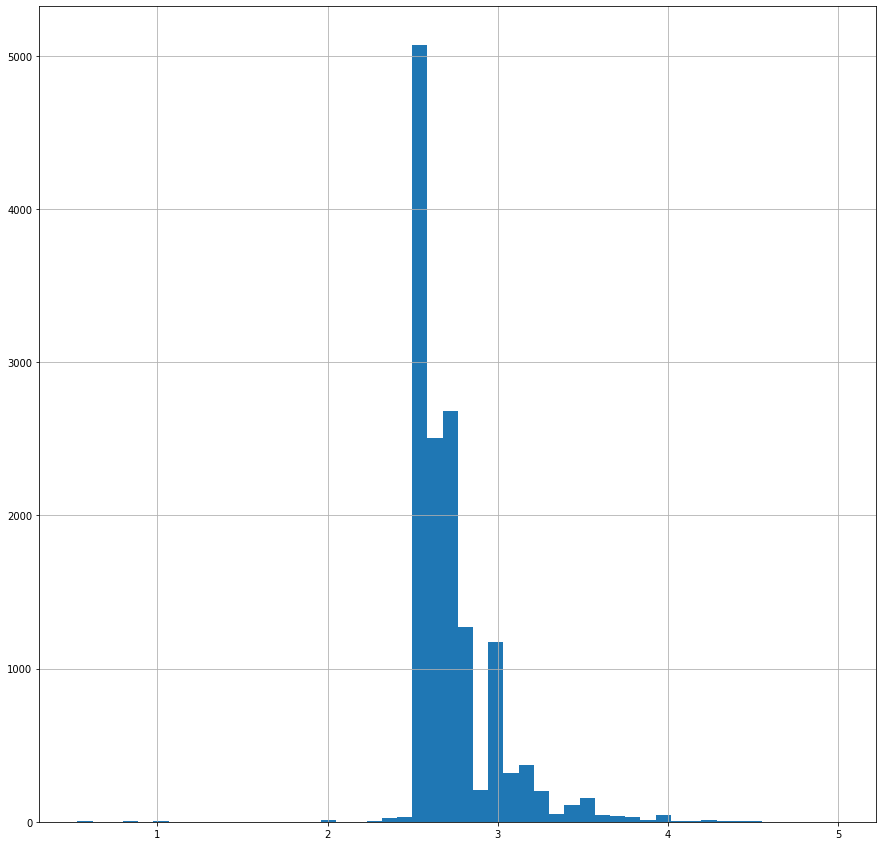

In [28]:
data['ceiling_height'].hist(bins=50, figsize=(15, 15));

Судя по гистограмме, можно смело отбрасывть всё то, что меньше 2,3 м и выше 4. Потом найдя медиану, можно заменить ею пустующие значения. 

In [29]:
data.drop(index=data.query('ceiling_height > 4').index, inplace=True) # удаляем лишние значения
data.drop(index=data.query('ceiling_height < 2.3').index, inplace=True)
height_median = data['ceiling_height'].median() # присваиваем значение медианы и заменяем ею пустые значения
data['ceiling_height'].fillna(height_median, inplace=True)
data.isna().sum() # проверяем

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1877
floor                       0
is_apartment            20743
studio                      0
open_plan                   0
kitchen_area             2248
balcony                 11404
locality_name              49
airports_nearest         5521
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15542
ponds_around3000         5500
ponds_nearest           14513
days_exposition          3141
dtype: int64

##### Столбец floors_total

Следующий столбец 'floors_total'. Взглянем на него.

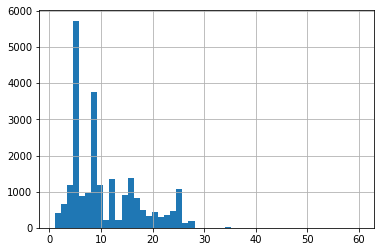

In [30]:
data['floors_total'].hist(bins=50);

In [31]:
data['floors_total'].describe()

count    23413.000000
mean        10.706402
std          6.600372
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Минимум на первом этаже, логично. Максимальное значение 60, не бывал в Питере, поэтому не знаю, есть ли такие там высотки, но за рамки разумного это не выходит. Из всех объявлений максимальный этаж продажи был 33-ий. Но, думаю это не столь значимый для нас момент. Медиана лежит на "девятиэтажках". Стоит ли избавлятся от пропусков в данном столбце? Можем взглянуть на эти строки.

In [32]:
data.query('floors_total.isna()').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
1930,1,9750000.0,66.77,2016-05-13,2,2.65,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,39886.0,10660.0,1.0,2276.0,3.0,244.0,90.0
2392,7,5395770.0,53.00,2017-06-29,2,2.65,NaN,29.00,22,NaN,...,9.00,0.0,Санкт-Петербург,43074.0,10820.0,0.0,NaN,0.0,NaN,48.0
2846,4,2325000.0,27.80,2016-09-21,1,2.65,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
2952,10,6500000.0,54.30,2019-04-23,1,2.65,NaN,22.20,6,NaN,...,12.30,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
3031,9,6400000.0,56.70,2018-03-27,2,2.65,NaN,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0


Не имею вариантов того, чем заменить эти пропуски. Так как по инструкции проекта в дальнейшем этажности придется категоризировать и учитывая не большое количество строк с пропусками, буду удалять. А также необходимо удалить те строки, которые могу быть одновременно и первым этажом и последним, т.е. одноэтажные здания.

In [33]:
data.dropna(subset=['floors_total'], inplace=True)
data.drop(index=data.query('floors_total == 1').index, inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1839
floor                       0
is_apartment            20634
studio                      0
open_plan                   0
kitchen_area             2195
balcony                 11341
locality_name              48
airports_nearest         5492
cityCenters_nearest      5472
parks_around3000         5471
parks_nearest           15467
ponds_around3000         5471
ponds_nearest           14456
days_exposition          3127
dtype: int64

#### Столбец living_area

Теперь смотрим столбец 'living_area' 

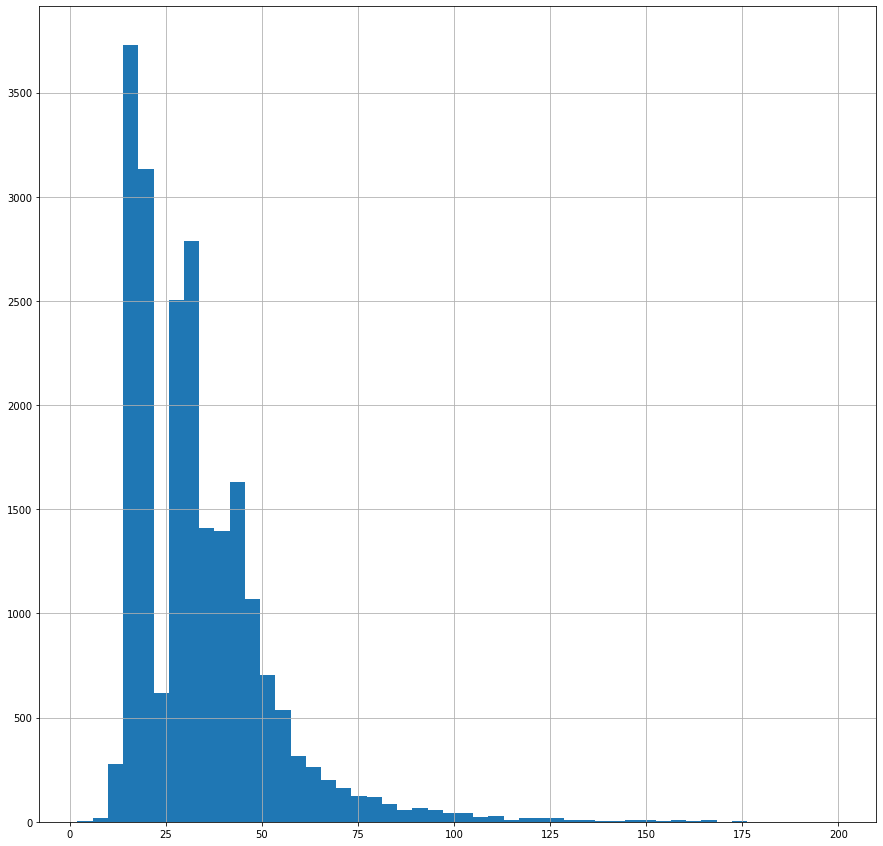

In [34]:
data['living_area'].hist(bins=50, figsize=(15,15));

In [35]:
data['living_area'].describe()

count    21549.000000
mean        33.620900
std         18.524044
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        200.000000
Name: living_area, dtype: float64

Здесь по гистограмме видны околонулевые значения, численное описание показывает минимум 2, явно ошибка. Думаю, всё что меньше 8 м2 жилплощади - это нонсенс. 

In [36]:
data.drop(index=data.query('living_area < 8').index, inplace=True) #удаляю не правдоподобные значения

Правильнее будет найти медианы для квартир с 1 комнатой, 2 и тд. Заменив этими медианами пропуски в соответствии с количеством комнат.

In [37]:
data.groupby('rooms')['living_area'].median()

rooms
0     18.00
1     17.60
2     30.50
3     45.00
4     63.30
5     89.70
6    113.35
7    127.70
Name: living_area, dtype: float64

In [38]:
for i in data['rooms'].unique(): # меняю пропуски на соответствующие медианы, которые зависят от количества комнат
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20626
studio                      0
open_plan                   0
kitchen_area             2193
balcony                 11335
locality_name              48
airports_nearest         5491
cityCenters_nearest      5471
parks_around3000         5470
parks_nearest           15464
ponds_around3000         5470
ponds_nearest           14451
days_exposition          3127
dtype: int64

#### Столбец is_apartment

Следующий столбец 'is_apartment'. Больше всего пропусков именно в этом столбце. Посмотрим на него, выведем уникальные значения. 

In [39]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Явно булев тип столбца, но находящийся в строчном типе. Предполагаю, что данный столбец заполняли побольшей части только в случае, когда объект недвижимости имел статус апартаментов, в остальных случаях его попросту пропускали. Поэтому заполняем его значением False. Хотя не знаю, имеет ли вообще смысл его трогать. но все же. 

In [40]:
data['is_apartment'].astype('bool') # меняем тип столбца на булев
data['is_apartment'].fillna(False,  inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2193
balcony                 11335
locality_name              48
airports_nearest         5491
cityCenters_nearest      5471
parks_around3000         5470
parks_nearest           15464
ponds_around3000         5470
ponds_nearest           14451
days_exposition          3127
dtype: int64

#### Столбец kitchen_area

Следующий столбец 'kitchen_area'. Посмотрим на него. 

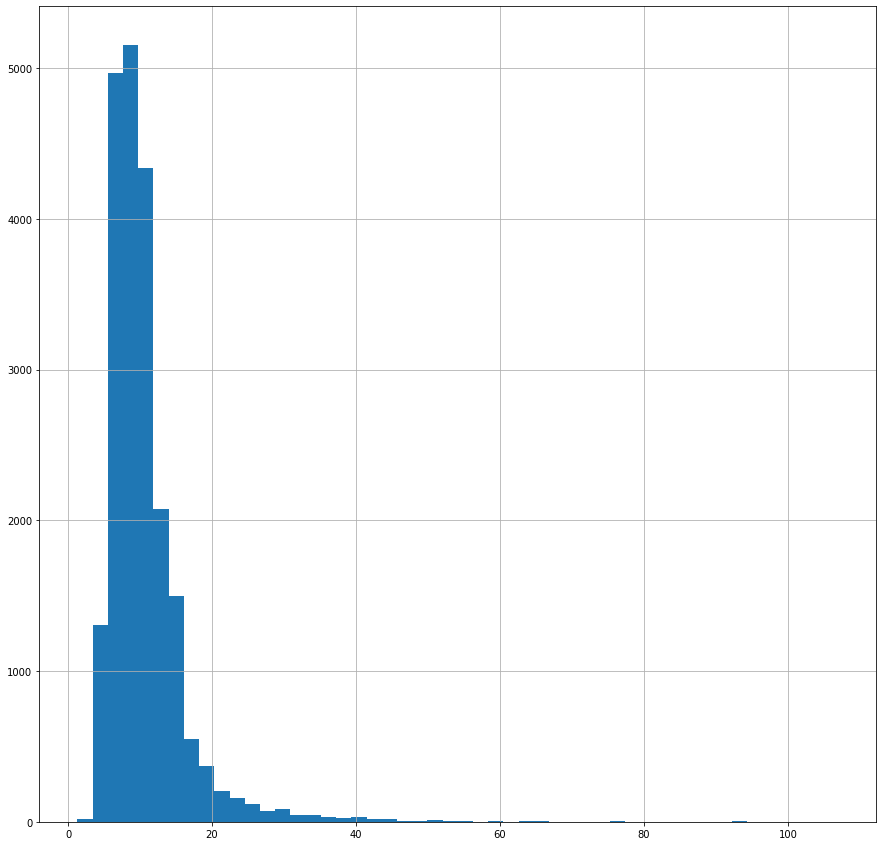

In [41]:
data['kitchen_area'].hist(bins=50, figsize=(15, 15));

In [42]:
data['kitchen_area'].describe()

count    21187.000000
mean        10.434906
std          5.507300
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Минимум на 1,3 кв м - бред, и максимум 107 - тоже малоправдоподобно, хотя у богатых граждан вполне возможно и больше площади, но всё же это явно выбивающиеся значения. 
Считаю необходимым удалить то что меньше 5 и то что более(судя по гистограмме) 45

In [43]:
data.drop(index=data.query('kitchen_area < 5').index, inplace=True)
data.drop(index=data.query('kitchen_area > 45').index, inplace=True)

По аналогии с жилплощадью заполним пустующие значения соответствующими медианами. Но вспомним, что у всех rooms=0 - студий площадь кухни была пропущена.

In [44]:
data.groupby('rooms')['kitchen_area'].median()

rooms
0     NaN
1     9.1
2     8.8
3     9.5
4    11.0
5    15.0
6    17.7
7    17.0
Name: kitchen_area, dtype: float64

In [45]:
for i in range(1,8): # меняю пропуски на соответствующие медианы, которые зависят от количества комнат
    data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == i), 'kitchen_area'].median()
data['kitchen_area'].fillna(0, inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11263
locality_name              48
airports_nearest         5455
cityCenters_nearest      5435
parks_around3000         5434
parks_nearest           15365
ponds_around3000         5434
ponds_nearest           14364
days_exposition          3102
dtype: int64

Проверим логику получившегося. Нет ли таких строк, где общая площадь меньше суммы жилой и кухни. Если есть то удалим

In [46]:
data.query('total_area < living_area + kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
184,7,2600000.0,30.20,2018-02-14,1,2.65,9.0,26.1,5,False,...,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
227,13,2200000.0,47.00,2018-01-12,3,2.34,5.0,45.0,1,False,...,9.50,NaN,посёлок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0
322,6,2000000.0,25.00,2017-02-07,1,2.65,5.0,17.6,5,False,...,9.10,0.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,45.0
545,9,4700000.0,23.80,2018-12-28,1,2.65,18.0,20.0,9,False,...,5.00,NaN,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0
546,0,6000001.0,25.00,2018-11-16,1,3.00,5.0,17.6,5,False,...,9.10,NaN,Санкт-Петербург,25169.0,3871.0,1.0,207.0,1.0,776.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23102,0,5800000.0,66.00,2017-06-09,5,2.65,5.0,55.5,1,False,...,15.00,0.0,Санкт-Петербург,12007.0,11933.0,0.0,NaN,0.0,NaN,21.0
23191,3,1900000.0,18.90,2016-04-04,1,2.65,16.0,16.0,12,False,...,9.10,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.0
23202,13,4919880.0,67.92,2018-10-23,2,2.65,3.0,63.0,3,False,...,13.04,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.0
23579,7,2350000.0,24.80,2018-06-07,1,2.65,10.0,18.0,2,False,...,9.10,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89.0


In [47]:
# удалим подобные не соответствия
data.drop(index=data.query('total_area < living_area + kitchen_area').index, inplace=True) 

#### Столбец balcony

Следующий столбец 'balcony'. Взглянем.

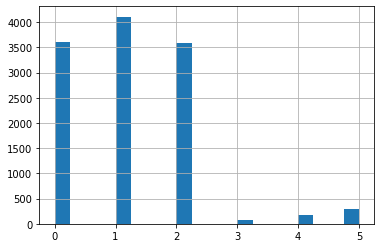

In [49]:
data['balcony'].hist(bins=20);

Никогда не видел квартиры с пятью балконами, но всё же их доля не мала. Что делать с ними даже не знаю. На сколько в дальнейших расчетах будет влиять, посмотрим. Ну а пока заменим пропуски, как и подсказывалось в инструкции к проекту, на 0.

In [50]:
data['balcony'].fillna(0, inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              47
airports_nearest         5335
cityCenters_nearest      5315
parks_around3000         5314
parks_nearest           15132
ponds_around3000         5314
ponds_nearest           14165
days_exposition          3079
dtype: int64

#### Столбец locality_name

Теперь рассмотрим столбец 'locality_name', который имеет строчный тип. Но сперва удалим пропуски, потому как логически их заменить нечем.

In [51]:
data.dropna(subset=['locality_name'], inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5327
cityCenters_nearest      5307
parks_around3000         5306
parks_nearest           15100
ponds_around3000         5306
ponds_nearest           14142
days_exposition          3078
dtype: int64

In [52]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [53]:
len(data['locality_name'].unique())

358

358 значений.

In [54]:
from collections import Counter
Counter(data['locality_name'])

Counter({'Санкт-Петербург': 15210,
         'посёлок Шушары': 433,
         'городской посёлок Янино-1': 60,
         'посёлок Парголово': 324,
         'посёлок Мурино': 490,
         'Ломоносов': 130,
         'Сертолово': 142,
         'Петергоф': 200,
         'Пушкин': 360,
         'деревня Кудрово': 283,
         'Коммунар': 88,
         'Колпино': 334,
         'поселок городского типа Красный Бор': 5,
         'Гатчина': 297,
         'поселок Мурино': 27,
         'деревня Фёдоровское': 8,
         'Выборг': 229,
         'Кронштадт': 93,
         'Кировск': 81,
         'деревня Новое Девяткино': 142,
         'посёлок Металлострой': 65,
         'посёлок городского типа Лебяжье': 11,
         'посёлок городского типа Сиверский': 29,
         'поселок Молодцово': 9,
         'поселок городского типа Кузьмоловский': 13,
         'садовое товарищество Новая Ропша': 1,
         'Павловск': 38,
         'деревня Пикколово': 1,
         'Всеволожск': 389,
         'Волхов': 110,


Думаю, что просто заменять е на ё статусах населенных пунктов смысла мало. Да и вообще смысла от наличия статусов населенных пунктов нет, поэтому попросту уберем их, оставив только названия. Потому что более вероятно, что статусы могут быть разными, а иметься ввиду один и тот же населенный пункт.  

In [55]:
data['locality_name'] = data['locality_name'].replace({'городской поселок ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'поселок городского типа ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'деревня ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'село ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'поселок ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'садовое товарищество ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'посёлок ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'Пансионат ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'коттеджный ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'городской ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'городского типа ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'садоводческое некоммерческое товарищество ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'станции ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'при железнодорожной ' : ''}, regex=True)
data['locality_name'] = data['locality_name'].replace({'имени ' : ''}, regex=True)

In [56]:
from collections import Counter
Counter(data['locality_name'])

Counter({'Санкт-Петербург': 15210,
         'Шушары': 433,
         'Янино-1': 67,
         'Парголово': 324,
         'Мурино': 550,
         'Ломоносов': 130,
         'Сертолово': 142,
         'Петергоф': 200,
         'Пушкин': 360,
         'Кудрово': 448,
         'Коммунар': 88,
         'Колпино': 334,
         'Красный Бор': 8,
         'Гатчина': 297,
         'Фёдоровское': 15,
         'Выборг': 229,
         'Кронштадт': 93,
         'Кировск': 81,
         'Новое Девяткино': 142,
         'Металлострой': 65,
         'Лебяжье': 15,
         'Сиверский': 29,
         'Молодцово': 9,
         'Кузьмоловский': 35,
         'Новая Ропша': 1,
         'Павловск': 38,
         'Пикколово': 1,
         'Всеволожск': 389,
         'Волхов': 110,
         'Кингисепп': 101,
         'Приозерск': 65,
         'Сестрорецк': 179,
         'Куттузи': 6,
         'Аннино': 16,
         'Ефимовский': 2,
         'Плодовое': 5,
         'Заклинье': 3,
         'Торковичи': 3,
         'П

In [57]:
len(data['locality_name'].unique())

299

В итоге получили 299 уникальных значения - названия нп. 

In [58]:
# check
data.locality_name.nunique()

299

#### Столбец airports_nearest

Следующий столбец "airports_nearest". Посмотрим

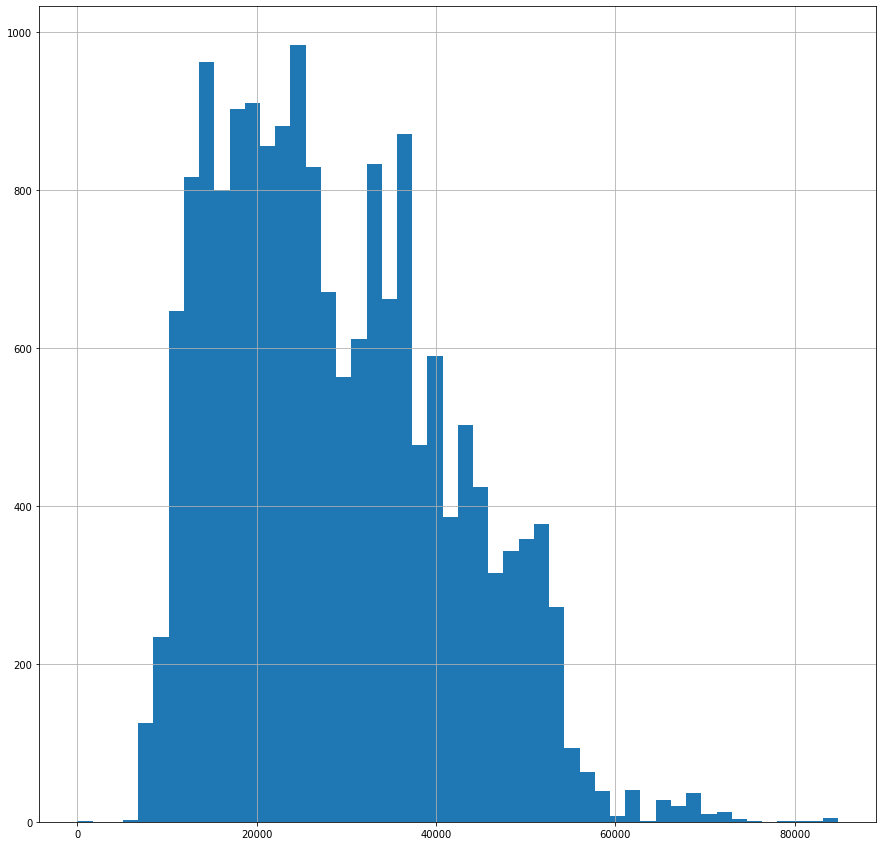

In [59]:
data['airports_nearest'].hist(bins=50, figsize=(15,15));

In [60]:
data['airports_nearest'].describe()

count    17563.000000
mean     28842.915846
std      12660.647765
min          0.000000
25%      18522.000000
50%      26862.000000
75%      37380.500000
max      84869.000000
Name: airports_nearest, dtype: float64

По гистограмме ничего сверхестественного не вижу. Какие то населенные пункты ближе, какие то дальше. Надо больше думать о том, чем заменить пропуски. Вижу только вариант заполнять их медианами которые характерны для каждого населенного пункта по отдельности.

In [61]:
data.groupby('locality_name').median().head(10)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
locality_name,,,,,,,,,,,,,,,,,,,,
Агалатово,6.5,3570000.0,45.50,1.5,2.650,4.5,24.50,4.0,False,False,False,8.25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
Александровская,7.5,8725000.0,118.50,3.0,2.710,9.5,80.50,3.0,False,False,False,11.50,0.5,12896.5,27468.0,0.0,NaN,1.0,711.5,78.5
Алексеевка,8.0,1000000.0,45.00,2.0,2.650,2.0,29.50,1.0,False,False,False,6.20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,416.0
Аннино,10.0,2915000.0,45.50,2.0,2.625,5.0,30.00,3.0,False,False,False,8.30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,172.0
Аро,1.0,3240000.0,58.60,2.0,2.650,4.0,31.50,1.0,False,False,False,12.50,2.0,NaN,NaN,NaN,NaN,NaN,NaN,137.0
Барышево,7.0,2000000.0,62.60,2.5,2.600,2.5,37.65,1.5,False,False,False,8.25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,252.5
Батово,2.0,1500000.0,58.00,3.0,2.650,5.0,42.50,3.0,False,False,False,5.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,86.0
Бегуницы,13.0,2100000.0,53.15,2.5,2.625,5.0,35.25,2.0,False,False,False,8.65,1.0,NaN,NaN,NaN,NaN,NaN,NaN,160.0
Белогорка,8.0,1670000.0,41.00,2.0,2.500,4.0,29.00,2.0,False,False,False,6.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,339.5


Многие населенные пункты не имееют ни одного указания на расстояние до аэропорта. Заменять в этих столбцах логически нечем. Поэтому придется пропустить без заполнения. Заполним только те нп, которые имеют хоть одно указание на расстояние в таблице. 

In [62]:
for i in data['locality_name'].unique(): # меняю пропуски на соответствующие медианы, которые зависят от населенного пункта 
        data.loc[(data['locality_name'] == i) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
        data.loc[(data['locality_name'] == i), 'airports_nearest'].median()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5244
cityCenters_nearest      5307
parks_around3000         5306
parks_nearest           15100
ponds_around3000         5306
ponds_nearest           14142
days_exposition          3078
dtype: int64

####  Столбцы cityCenters_nearest,  parks_around3000,  parks_nearest,  ponds_around3000,  ponds_nearest

Программа хоть и ругается, но замену произвела.
Последующие столбцы аналогичны. Сними произведем схожие действия.

In [63]:
for i in data['locality_name'].unique():
        data.loc[(data['locality_name'] == i) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
        data.loc[(data['locality_name'] == i), 'cityCenters_nearest'].median()
for i in data['locality_name'].unique():
        data.loc[(data['locality_name'] == i) & (data['parks_around3000'].isna()), 'parks_around3000'] = \
        data.loc[(data['locality_name'] == i), 'parks_around3000'].median()
for i in data['locality_name'].unique():
        data.loc[(data['locality_name'] == i) & (data['parks_nearest'].isna()), 'parks_nearest'] = \
        data.loc[(data['locality_name'] == i), 'parks_nearest'].median()
for i in data['locality_name'].unique():
        data.loc[(data['locality_name'] == i) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = \
        data.loc[(data['locality_name'] == i), 'ponds_around3000'].median()
for i in data['locality_name'].unique():
        data.loc[(data['locality_name'] == i) & (data['ponds_nearest'].isna()), 'ponds_nearest'] = \
        data.loc[(data['locality_name'] == i), 'ponds_nearest'].median()
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5244
cityCenters_nearest     5244
parks_around3000        5244
parks_nearest           5789
ponds_around3000        5244
ponds_nearest           5326
days_exposition         3078
dtype: int64

#### Столбец days_exposition

Остался столбец 'days_exposition'. Взглянем на него.

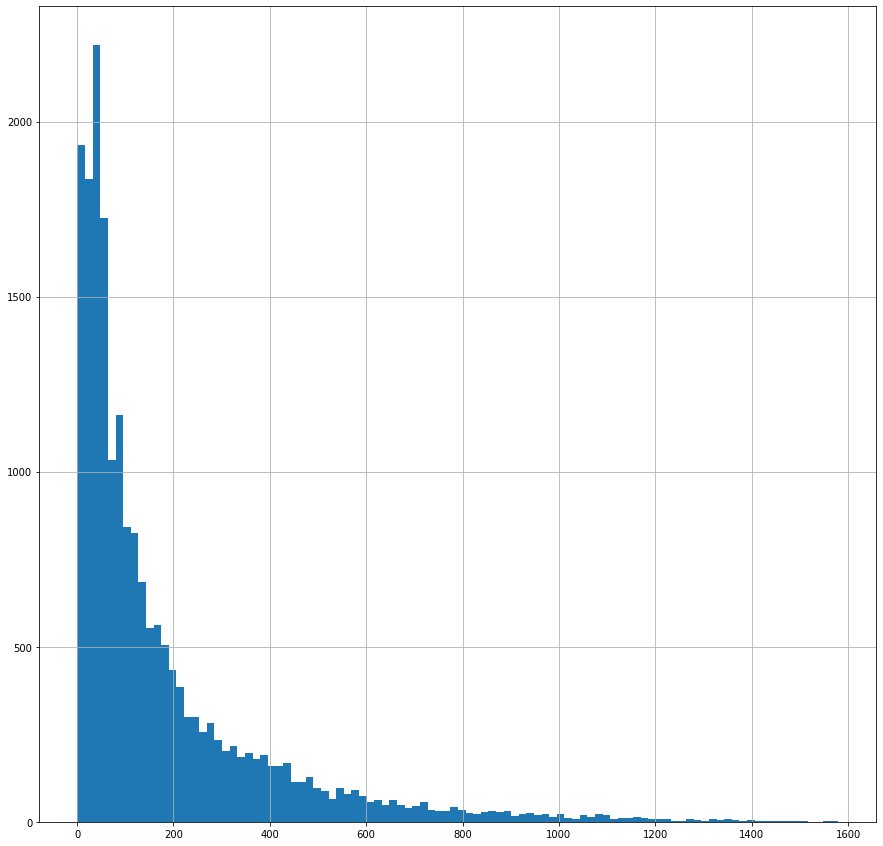

In [64]:
data['days_exposition'].hist(bins=100, figsize=(15,15));

In [65]:
data['days_exposition'].describe()

count    19812.000000
mean       180.651928
std        219.296534
min          1.000000
25%         45.000000
50%         96.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Минимум 1 день вполне реально, кому то повезло быстро продать или передумать. А вот максимум 1580 - больше 4 лет, это довольно долго. По гистограмме можно сделать вывод, что в районе 1000 дней, количество значений становится минимальным. Думаю что, все что больше необходимо обрезать. А по поводу пропусков думаю, что данные объявления еще не закрыты, поэтому совершать над ними какие либо манипуляции считаю не целесообразным.

In [66]:
data.drop(index=data.query('days_exposition > 1050').index, inplace=True)

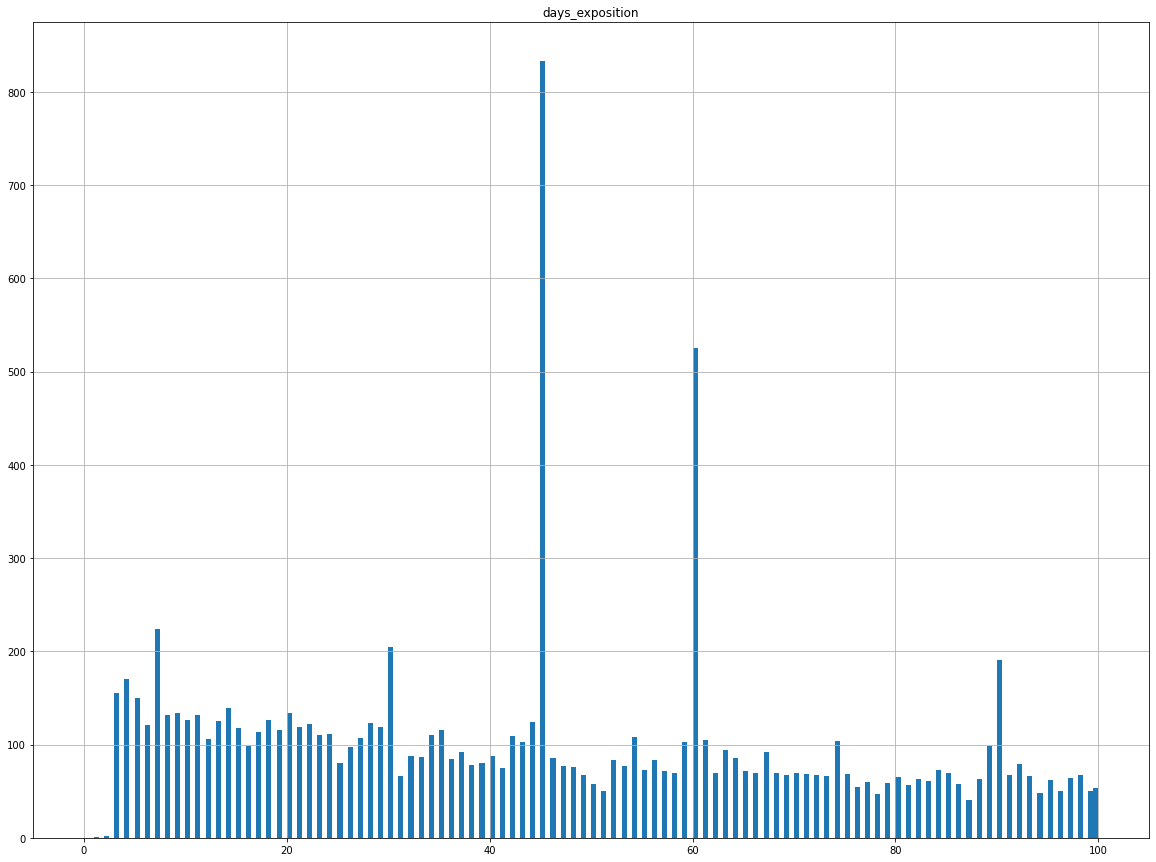

In [67]:
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
data.hist('days_exposition', bins=200, figsize=(20,15), range=(0,100));

Выбросы на 45ти и 60 днях. Возможно это какое то автоматическое закрытие объявлений после истечения этого срока!? На сколько обрубание этих строк повлияют на общий итог? Да и сколько их всего надо посмотреть. 

In [68]:
data.query('days_exposition == 45 or days_exposition == 60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22,20,5000000.0,58.0,2017-04-24,2,2.75,25.0,30.0,15,False,...,11.0,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60
78,9,4350000.0,37.0,2018-02-22,1,2.65,19.0,18.0,6,False,...,10.7,0.0,Санкт-Петербург,34324.0,14192.0,0.0,461.0,0.0,505.0,45
82,3,4500000.0,80.5,2018-01-15,3,2.65,25.0,45.0,16,False,...,9.5,0.0,Шушары,12430.0,18217.0,0.0,NaN,0.0,590.5,60
89,9,2500000.0,63.0,2018-10-25,3,2.50,5.0,43.0,4,False,...,9.0,0.0,Сиверский,NaN,NaN,NaN,NaN,NaN,NaN,45
105,12,4900000.0,32.0,2018-01-07,1,2.65,25.0,15.0,5,False,...,9.0,0.0,Санкт-Петербург,52480.0,15598.0,0.0,461.0,1.0,464.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23635,9,5100000.0,36.0,2018-10-26,1,2.80,15.0,18.0,11,False,...,8.0,0.0,Санкт-Петербург,13643.0,11673.0,0.0,461.0,1.0,405.0,60
23642,14,5950000.0,80.3,2018-07-03,3,2.70,12.0,45.0,5,False,...,9.5,0.0,Колпино,27933.0,33719.0,0.0,393.0,2.0,562.0,60
23670,9,2450000.0,45.6,2018-02-08,1,2.80,9.0,17.6,2,False,...,9.1,0.0,Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45
23679,0,2500000.0,35.0,2017-12-08,1,2.65,9.0,17.6,4,False,...,9.1,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45


Думаю, что избавляться от 1358 строк в данных будет перебором. Единственное на что это может повлиять, то это только при рассмотрении скорости продажи квартир. Да и это решается, просто убрав из рассмотрения эти дни или заменив медианами. 

#### check gap

In [69]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22676 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22676 non-null  int64         
 1   last_price            22676 non-null  float64       
 2   total_area            22676 non-null  float64       
 3   first_day_exposition  22676 non-null  datetime64[ns]
 4   rooms                 22676 non-null  int64         
 5   ceiling_height        22676 non-null  float64       
 6   floors_total          22676 non-null  float64       
 7   living_area           22676 non-null  float64       
 8   floor                 22676 non-null  int64         
 9   is_apartment          22676 non-null  bool          
 10  studio                22676 non-null  bool          
 11  open_plan             22676 non-null  bool          
 12  kitchen_area          22676 non-null  float64       
 13  balcony         

Не понимаю на сколько это принципиально касаемо данных столбцов. Тем более, что без избавления от NaN у меня это не получалось

In [70]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

In [71]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,676.00","22,676.00","22,676.00","19,598.00","22,676.00","22,676.00","22,676.00","22,676.00","22,676.00"
min,0.00,15.50,2.30,1.00,"430,000.00",8.00,0.00,1.00,2.00
max,7.00,250.00,4.00,"1,050.00","98,000,000.00",200.00,45.00,33.00,60.00
median,2.00,52.00,2.65,94.00,"4,605,003.00",30.19,9.10,4.00,9.00


Вообще не понимаю о каких аномалиях идёт речь??? 
В столбце 'days_exposition' обрублено то, что выше 1050 дней. Минимум 1 - правдоподобное значение.
В столбце 'kitchen_area' = 0, я уже ранее описывал, что речь идёт о студиях. Максимум обрезал на 45.
В столбце 'floors_total', минимум равный 1 обрезал, а нулевых и отрицательных значений в этом столбце нет, проверял еще до сдачи проекта на проверку. 

<AxesSubplot:>

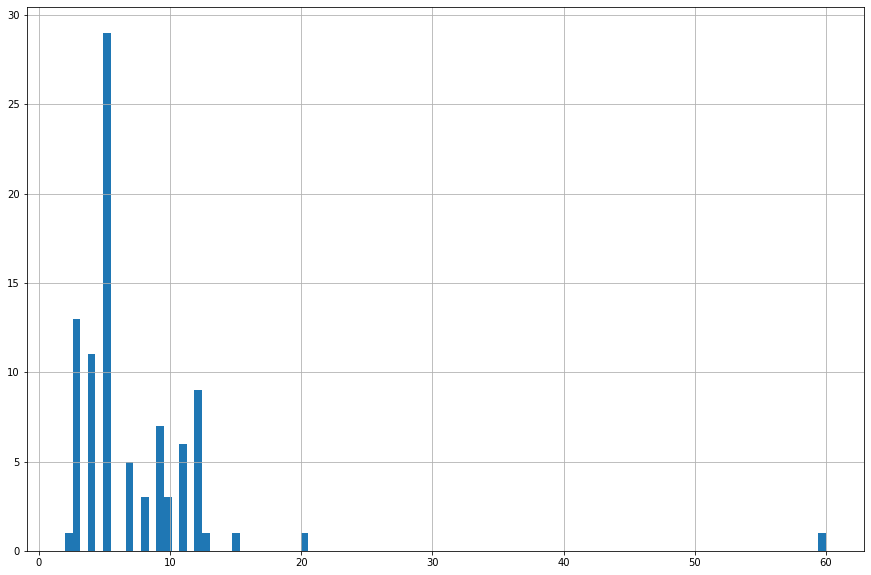

In [72]:
data.query('locality_name == "Кронштадт"')['floors_total'].hist(bins=100, figsize=(15,10))

In [73]:
data.query('floors_total==60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,7.4,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166


Расположен в кронштадте. Вполне возможно, что там подобных высоток нет и это опечатка при заполнении. Хорошо, уберем его. 

In [74]:
data.drop(index=data.query('floors_total == 60').index, inplace=True)

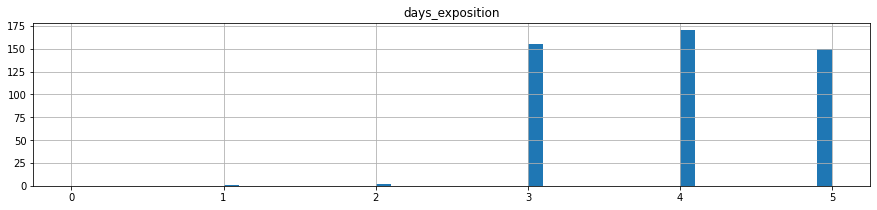

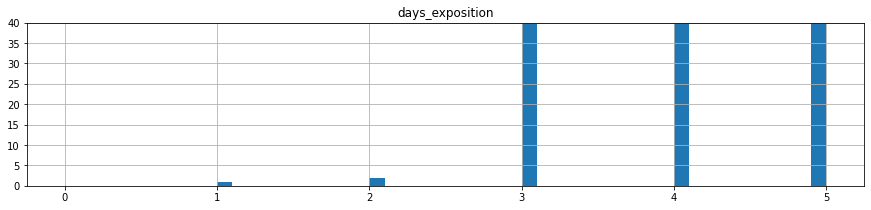

In [75]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [76]:
data.drop(index=data.query('days_exposition < 3').index, inplace=True)

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим в таблицу цену одного квадратного метра

In [84]:
data['price_sq_meter'] = round(data['last_price'] / data['total_area'], 2) 
data['price_sq_meter'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_sq_meter, dtype: float64

####  Добавим столбец дня недели публикации объявления

In [85]:
data['day_week_exposition'] = data['first_day_exposition'].dt.weekday
data['day_week_exposition'].head()

0    3
1    1
2    3
3    4
4    1
Name: day_week_exposition, dtype: int64

#### Добавим столбец месяца публикации объявления

In [86]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data['day_week_exposition'].head()

0    3
1    1
2    3
3    4
4    1
Name: day_week_exposition, dtype: int64

#### Добавим столбец года публикации объявления

In [87]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data['year_exposition'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_exposition, dtype: int64

####  Добавим столбец с типом этажей

In [88]:
def type_floor(row):
    floor_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'Первый'
    elif floor == floor_total:
        return " Последний"
    else:
        return 'Другой'
data['type_floor'] = data.apply(type_floor, axis=1)

data['type_floor_digit'] = data.apply(
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total) & isinstance(x.floors_total,int) 
    else 1), axis=1
)
data['type_floor'].head()

0    Другой
1    Первый
2    Другой
3    Другой
4    Другой
Name: type_floor, dtype: object

#### Добавим столбец с расстоянием до центра города в километрах

In [89]:
data['distance_to_center'] = round(data['cityCenters_nearest'] / 1000, 0)
data['distance_to_center'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: distance_to_center, dtype: float64

### Проведите исследовательский анализ данных

####  Изучим параметры объектов

##### Общая площадь

Построим гистограмму и описательную статистику, хоть ранее это и делалось.

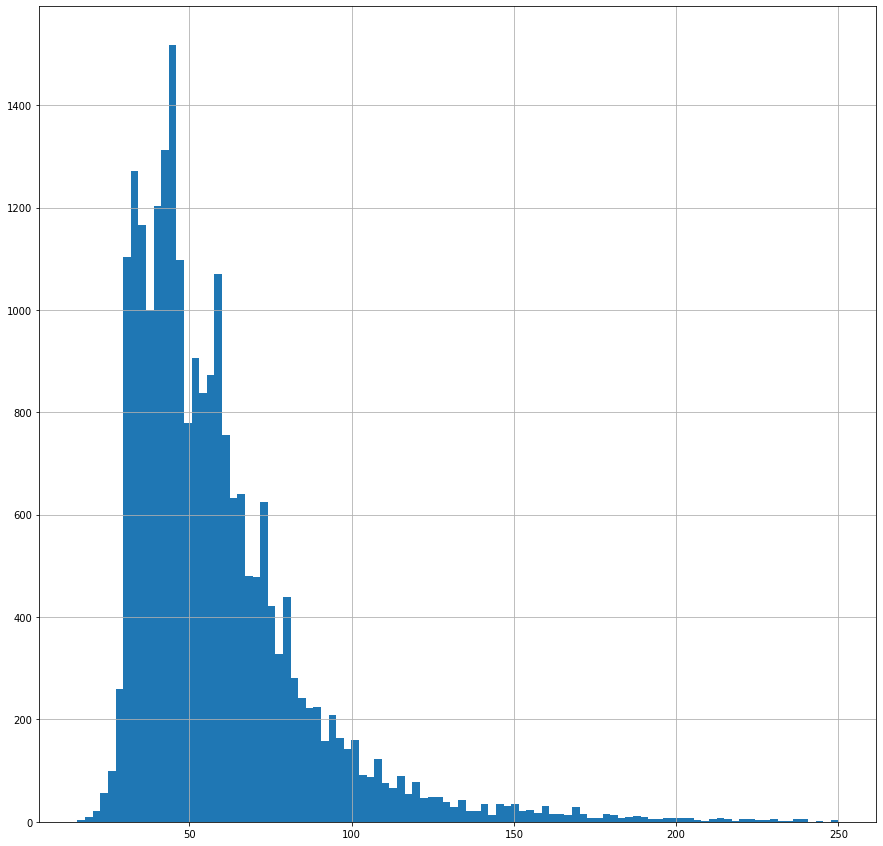

In [90]:
data['total_area'].hist(bins=100, figsize=(15,15));

In [91]:
data['total_area'].describe()

count    22672.000000
mean        58.764236
std         27.848809
min         15.500000
25%         40.000000
50%         52.000000
75%         69.000000
max        250.000000
Name: total_area, dtype: float64

По описанию видим, что большая часть публкаций имеет площадь менее 70 м2. Средняя площадь имеет 58, а медиана проходит по значению 52.

##### Жилая площадь

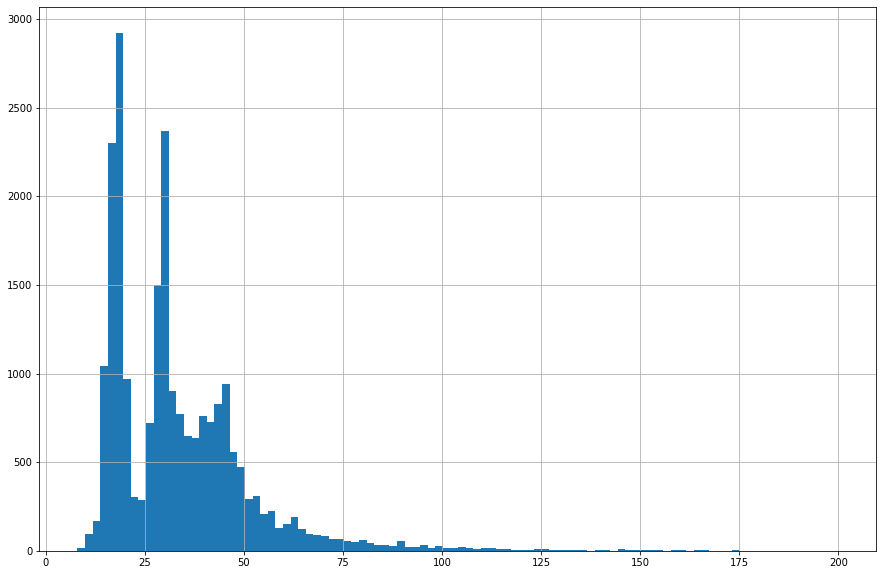

In [92]:
data['living_area'].hist(bins=100, figsize=(15,10));

In [93]:
data['living_area'].describe()

count    22672.000000
mean        33.426621
std         18.148299
min          8.000000
25%         18.400000
50%         30.200000
75%         42.100000
max        200.000000
Name: living_area, dtype: float64

На гистграмме видны два пика, скорее всего связано с резким отличием жилплощади однушек со студиями от двушек. Средняя площадь объектов - 33 кв, медиана - 30. Почти 3/4 из всех объектов имеет площадь меннее 42 кв.м.

#####  Площадь кухни

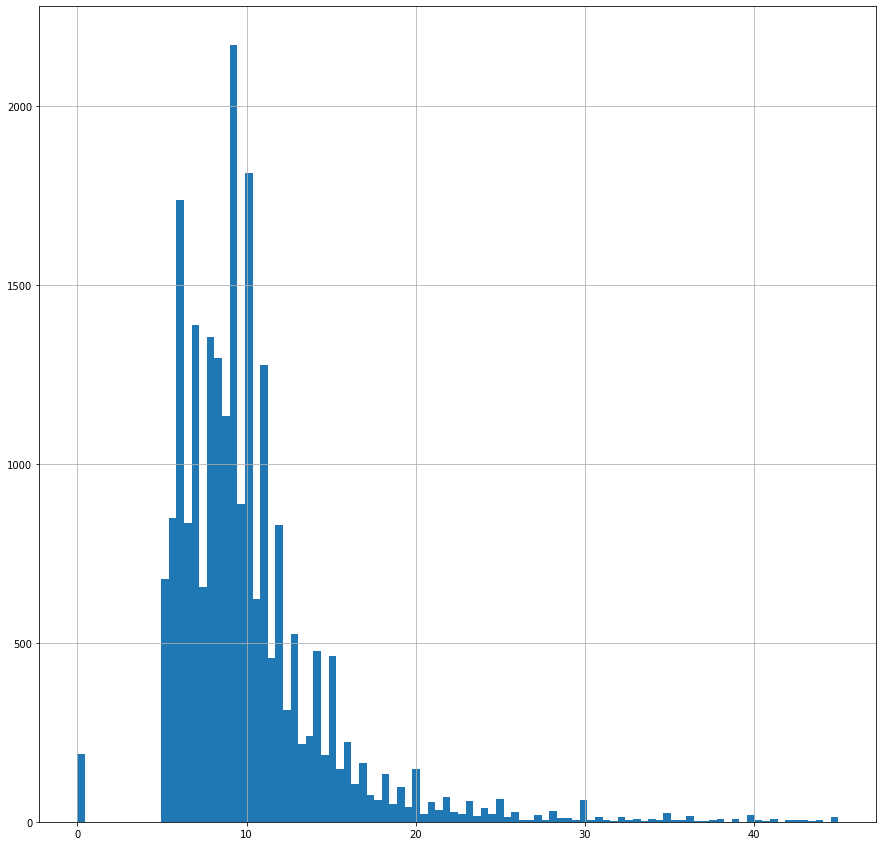

In [94]:
data['kitchen_area'].hist(bins=100, figsize=(15, 15));

In [95]:
data['kitchen_area'].describe()

count    22672.000000
mean        10.147478
std          4.785826
min          0.000000
25%          7.100000
50%          9.100000
75%         11.400000
max         45.000000
Name: kitchen_area, dtype: float64

На гистограмме видны нулевые значения. Связано это со студиями, в которых площадь была заменена нулем. Средняя площадь равна 10, а медиана - 9.

##### Цена объекта

<AxesSubplot:>

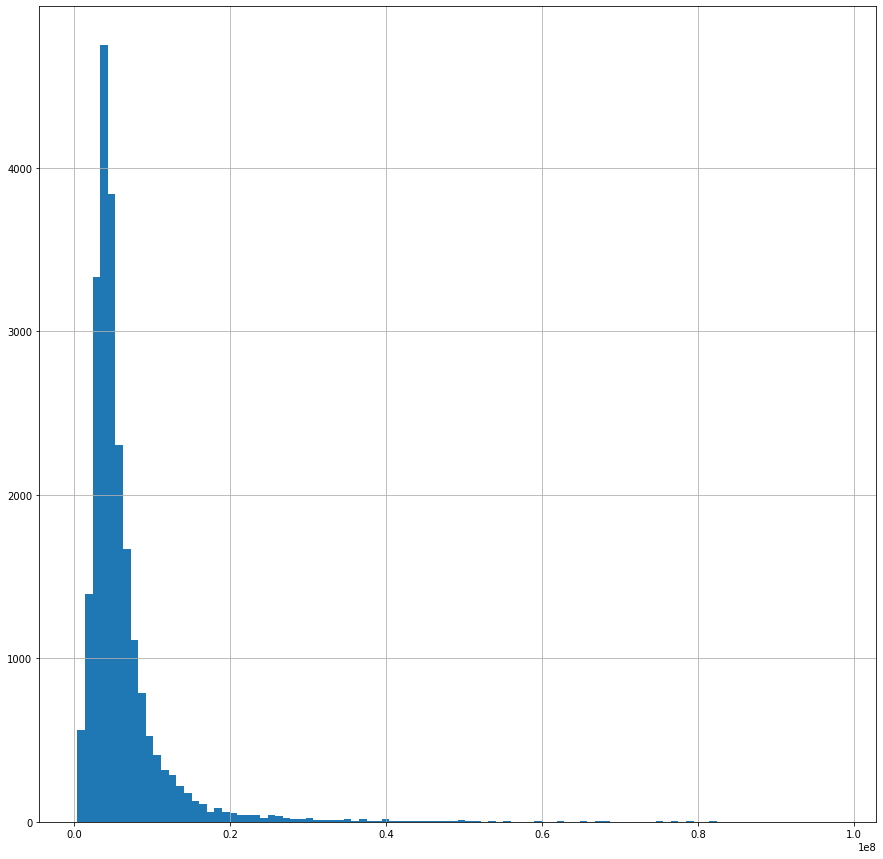

In [96]:
data['last_price'].hist(bins=100, figsize=(15, 15))

In [97]:
data['last_price'].describe()

count    2.267200e+04
mean     6.043047e+06
std      5.545597e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.610000e+06
75%      6.700000e+06
max      9.800000e+07
Name: last_price, dtype: float64

После всех фильтраций, по данной гистограмме видно, что можно было наверное отбросить объеты с ценой более 40 млн., а не со 100. Но и так считаю не плохо. Средняя цена объекта - 6 млн. Медиана - 4,6.

##### Количество комнат

<AxesSubplot:>

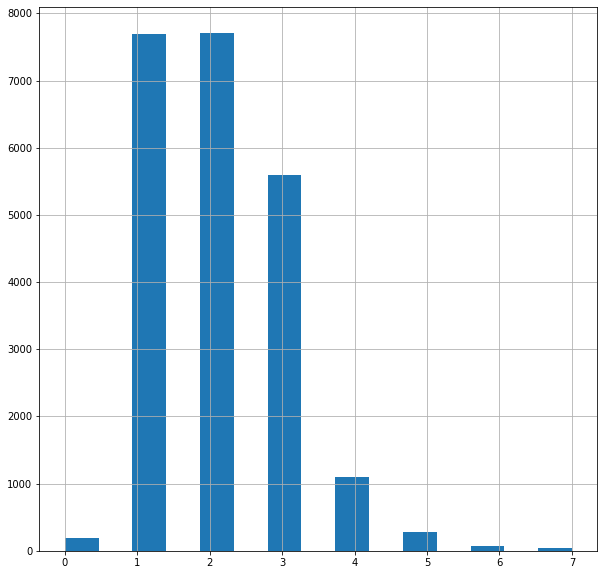

In [98]:
data['rooms'].hist(bins=15, figsize=(10,10))

In [99]:
data['rooms'].describe()

count    22672.000000
mean         2.045386
std          1.006404
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

После фильтраций картина по сути не поменялась. На рынке преобладают однушки, двушки и трешки. Почти с тем же соотношением, как и до того.

##### Высота потолков

<AxesSubplot:>

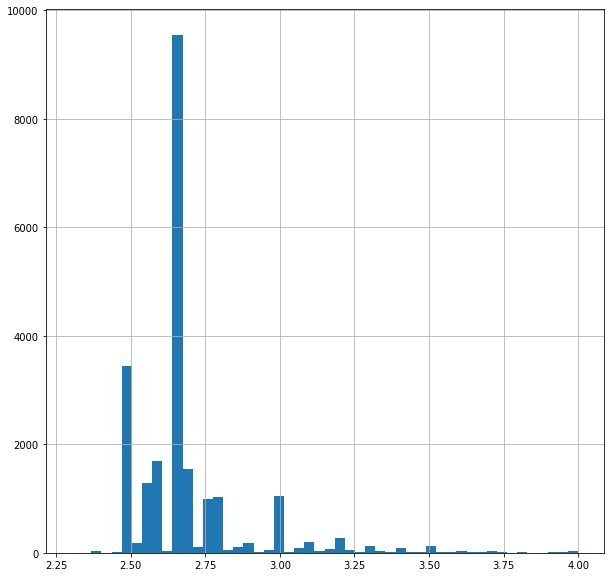

In [100]:
data['ceiling_height'].hist(bins=50, figsize=(10,10))

In [101]:
data['ceiling_height'].describe()

count    22672.000000
mean         2.690521
std          0.199295
min          2.300000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

Средняя высота потолков 2.69. Медианная 2,65. Что вполне стандартно и ожидаемо.

##### Этаж квартиры

<AxesSubplot:>

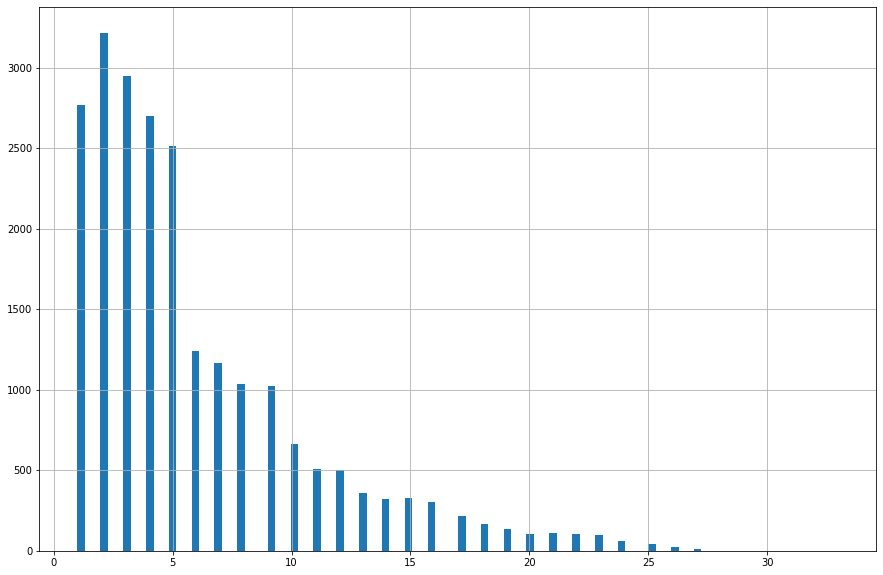

In [102]:
data['floor'].hist(bins=100, figsize=(15,10))

In [103]:
data['floor'].describe()

count    22672.00000
mean         5.87994
std          4.85512
min          1.00000
25%          2.00000
50%          4.00000
75%          8.00000
max         33.00000
Name: floor, dtype: float64

По гистограмме могу судить, что в Питере преобладают пятиэтажки и девятиэтажки. Потому как идут резкие обрывы в данных на 5 и на 9 этажах. Средняя проходит по почти 6-му этажу, а медиана на 4.

##### Тип этажа

<AxesSubplot:>

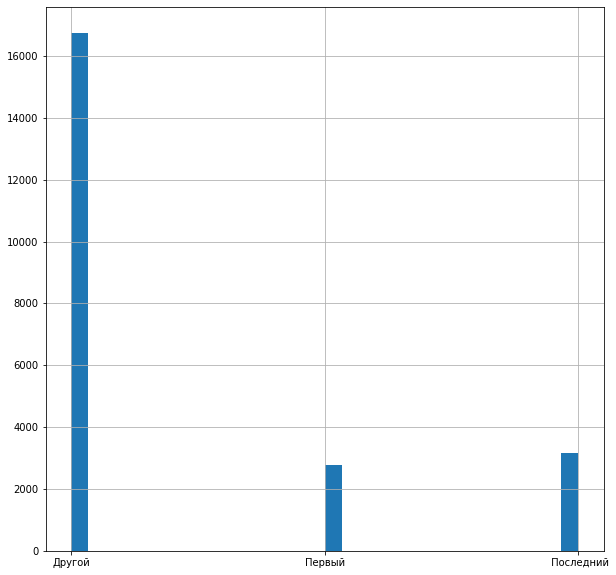

In [104]:
data['type_floor'].hist(bins=30, figsize=(10,10))

Если в городе этажность зданий превышает 3, то не удивительно преобладание "Другие".
"Первый" и "Последний" близки друг к другу.

##### Общее количество этажей в доме

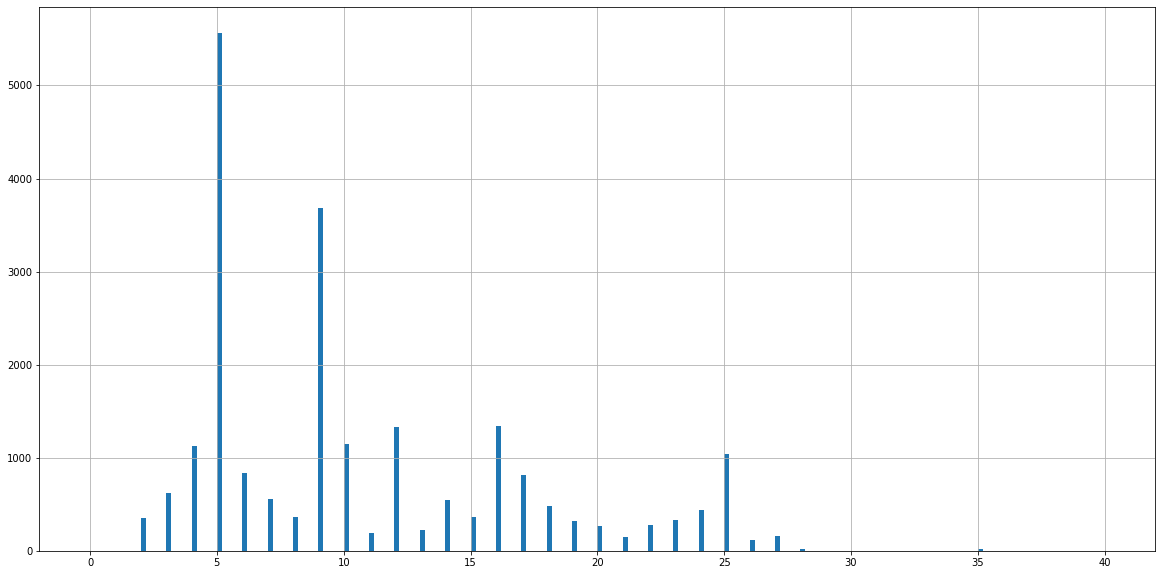

In [105]:
data['floors_total'].hist(bins=200, figsize=(20,10), range=(0,40));

In [106]:
data['floors_total'].describe()

count    22672.000000
mean        10.705055
std          6.564067
min          2.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64

Как и говорил ранее, каждый пик на гистограмме указывает на преобладающую этажность строений в городе. 5, 9, 12, 16 и тд. Средняя чуть более 10 и медиана 9.

##### Расстояние до центра города.

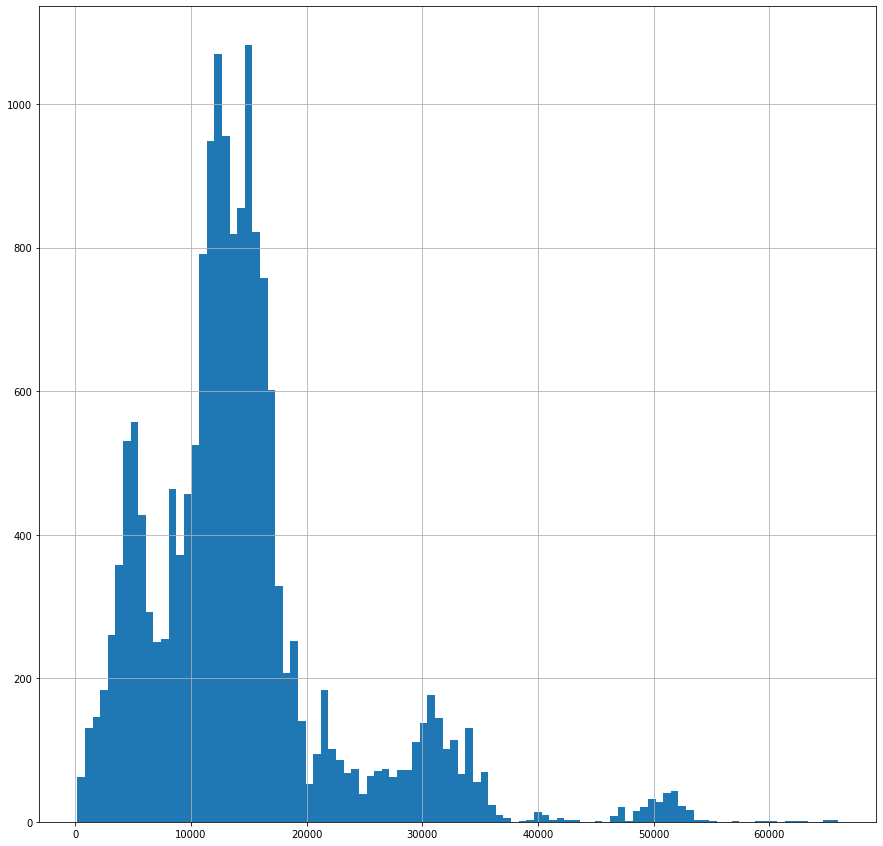

In [107]:
data['cityCenters_nearest'].hist(bins=100, figsize=(15,15));

In [108]:
data['cityCenters_nearest'].describe()

count    17456.000000
mean     14293.978145
std       8559.268519
min        181.000000
25%       9487.000000
50%      13149.000000
75%      16298.000000
max      65952.000000
Name: cityCenters_nearest, dtype: float64

Среднее расстояние равна чуть более 14 км и медиана 13149м. Большая часть объектов расположена в радиусе не более 16 км. 

##### Расстояние до ближайшего аэропорта

<AxesSubplot:>

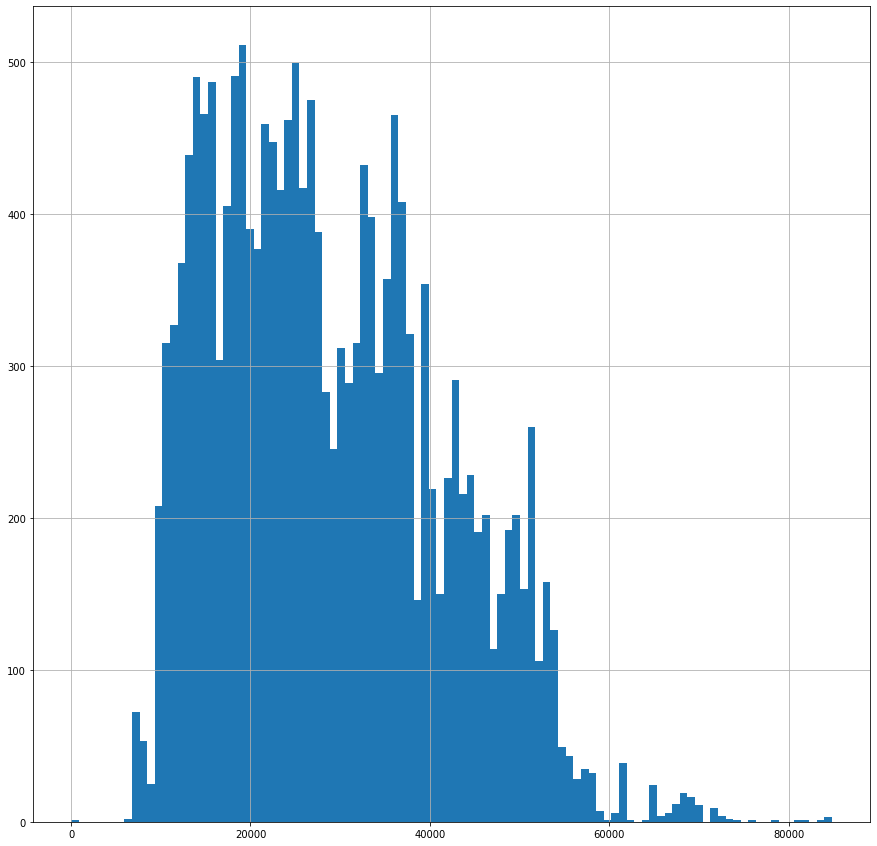

In [109]:
data['airports_nearest'].hist(bins=100, figsize=(15,15))

In [110]:
data['airports_nearest'].describe()

count    17456.000000
mean     28845.482241
std      12644.232189
min          0.000000
25%      18539.000000
50%      26902.000000
75%      37322.750000
max      84853.000000
Name: airports_nearest, dtype: float64

Есть объекты непосредственно у аэропорта судя по всему. Ну в среднем объекты удалены на более чем 28 км. Медиана же равна 26902 м.

##### Расстояние до ближайшего парка

<AxesSubplot:>

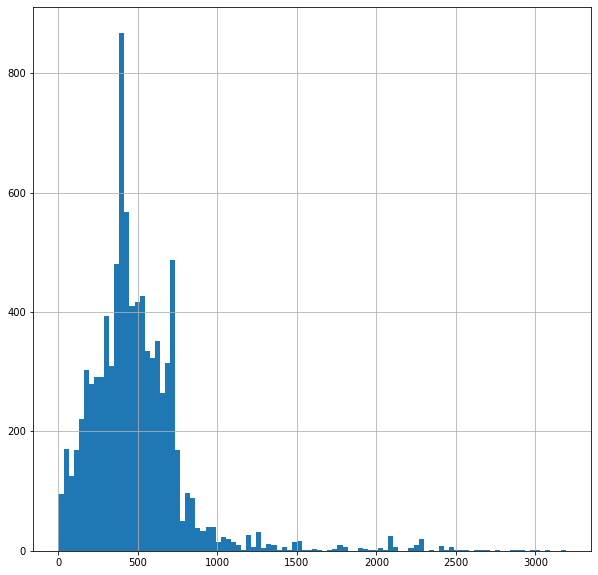

In [111]:
data.query('parks_nearest != 461')['parks_nearest'].hist(bins=100, figsize=(10,10))

In [112]:
data['parks_nearest'].describe()

count    16915.000000
mean       476.337304
std        233.030438
min          1.000000
25%        428.500000
50%        461.000000
75%        461.000000
max       3190.000000
Name: parks_nearest, dtype: float64

На гистограмме видим сильный всплеск на уровне 480. Связано это с заменой пустующих значений(там где это было возможно) на медиану по локации. Средняя равна 476, Медиана 461. 

##### День и месяц публикации

<AxesSubplot:>

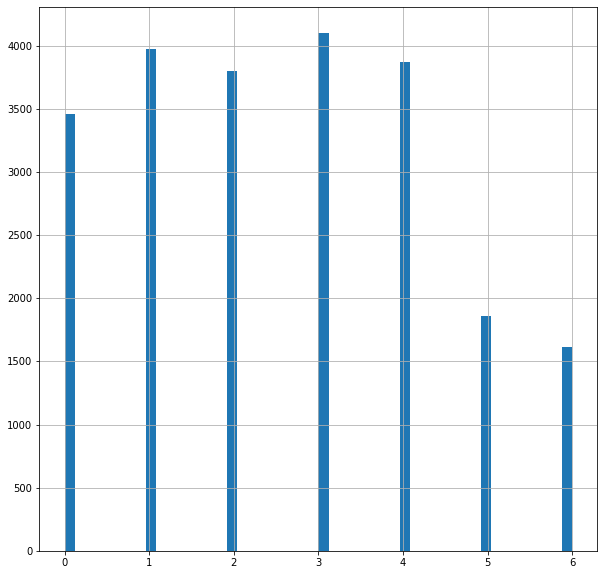

In [113]:
data['day_week_exposition'].hist(bins=50, figsize=(10,10))

<AxesSubplot:>

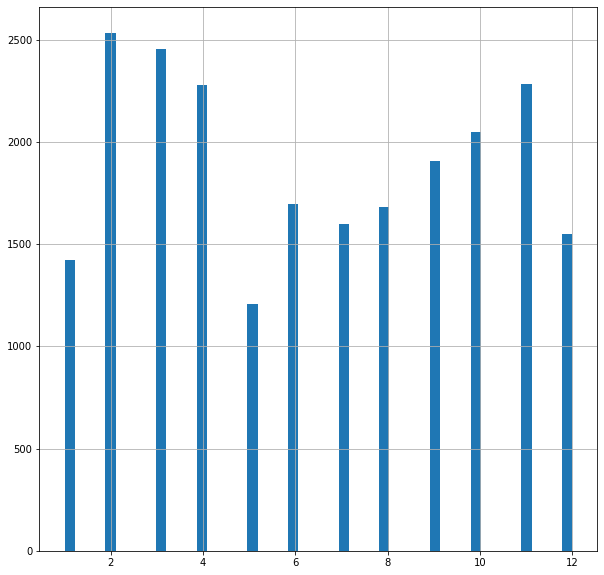

In [114]:
data['month_exposition'].hist(bins=50, figsize=(10,10))

In [115]:
display(data['day_week_exposition'].describe())
display(data['month_exposition'].describe())

count    22672.000000
mean         2.571674
std          1.788217
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_week_exposition, dtype: float64

count    22672.000000
mean         6.406140
std          3.489148
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

Меньше всего выкладывают объявления в выходные дни. Пики по месяцам достигают с февраля по апрель и с сентября и по ноябрь. Минимумы в мае и в декабре-январе. Может связаны с праздниками и с предновогодними приготовлениями.

#### Скорость продаж квартир

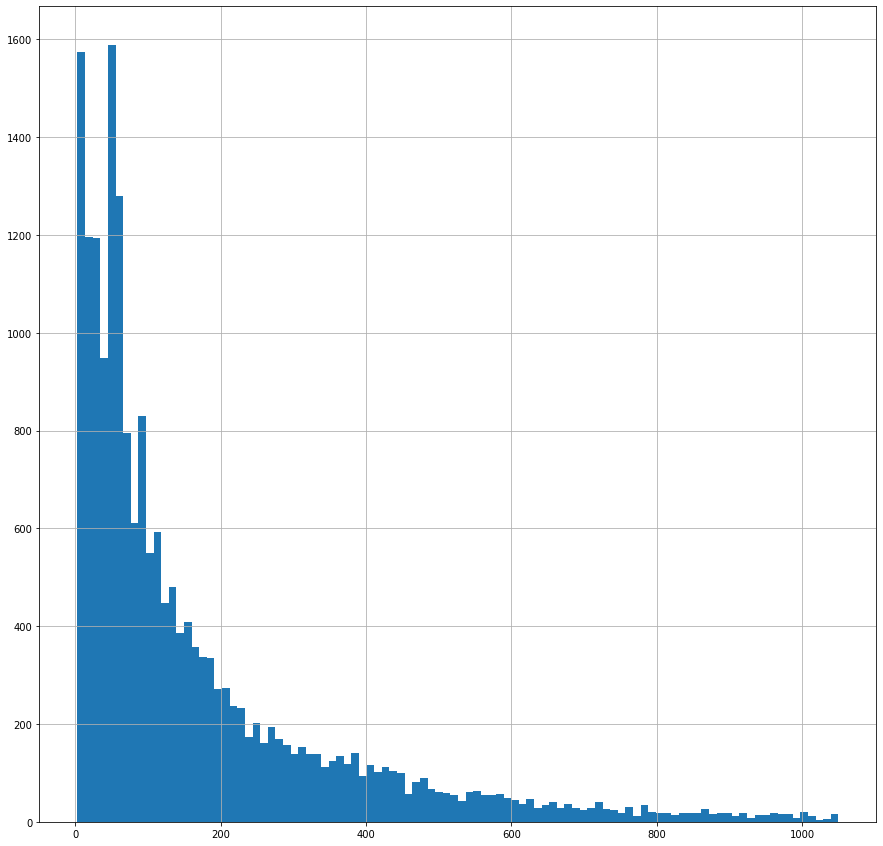

In [116]:
data['days_exposition'].hist(bins=100, figsize=(15,15));

In [117]:
data['days_exposition'].describe()

count    19594.000000
mean       169.508931
std        192.078388
min          3.000000
25%         44.000000
50%         94.000000
75%        223.000000
max       1050.000000
Name: days_exposition, dtype: float64

Средняя равна 169 дням, и на основании этого думать что половина продаж происходит именно за это время не верно. Так как среднюю продажу тянут в сторону увелечения относительно не многочисленные, но долголежащие объявления. 
На самом же деле половина продаж происходит за 94 дня, т.е. за три месяца, а не почти за полгода как по средней.
В категорию быстрых продаж можно отнести те, что меньше первой квартильи, т.е. меньше 44 дня. А в категорию долгих те, которые больше третьей квартильи - 223 дня.

#### Факторы влияющие на общую стоимость объекта

##### Общая площадь

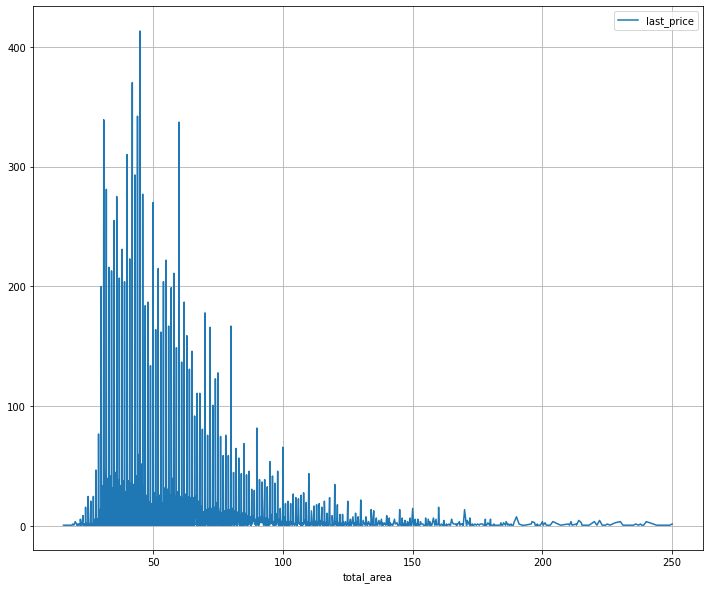

In [118]:
data.pivot_table(index='total_area', values='last_price', aggfunc='count').plot(grid=True, figsize=(12, 10));

По графику видно, что чем больше площадь, тем меньше ее цена. Получается понижение цены от увелечения квадратуры квартиры. Также видны выбросы, скорее всего связанные с длизостью к центру города.

##### Жилая площадь

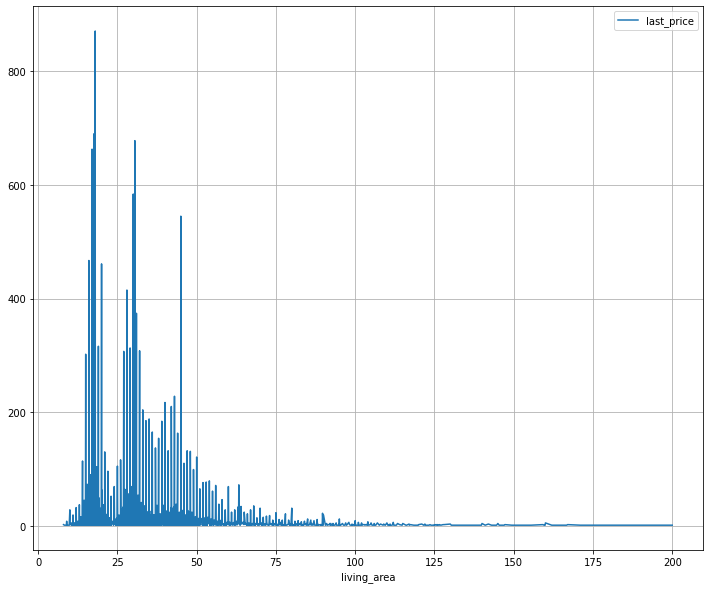

In [119]:
data.pivot_table(index='living_area', values='last_price', aggfunc='count').plot(grid=True, figsize=(12, 10));

Схожая картина с общей площадью. Видны пики, по всей видимостью связанные с увелечением числа комнат в квартире. Чем больше квадратура у однушки, тем ее цена за кв.м. падает. И чем меньше квадратура у двушки, тем выше ее цена.

##### Площадь кухни

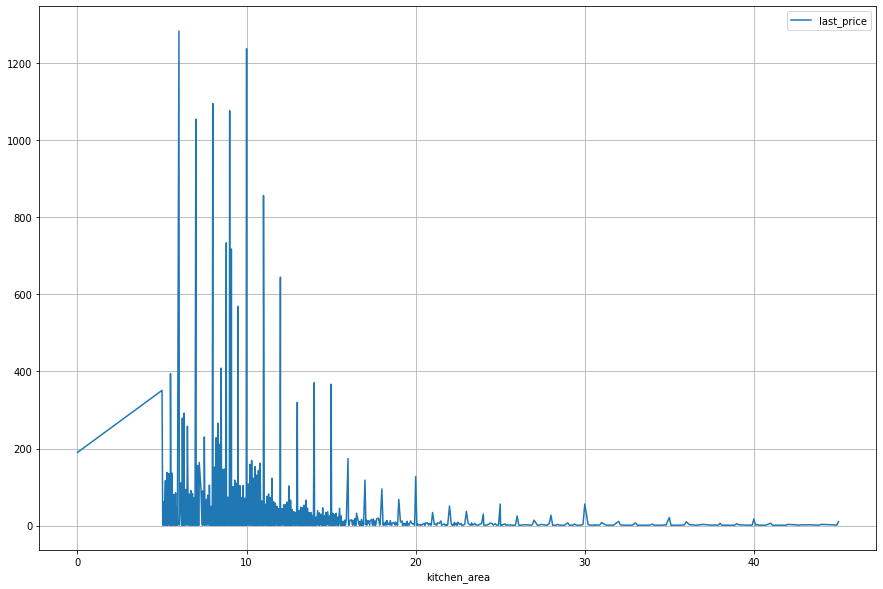

In [120]:
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='count').plot(grid=True, figsize=(15, 10));

Картина аналогичная предыдущим двум. Только есть нулевое включение относящееся к студиям.

##### Количество комнат

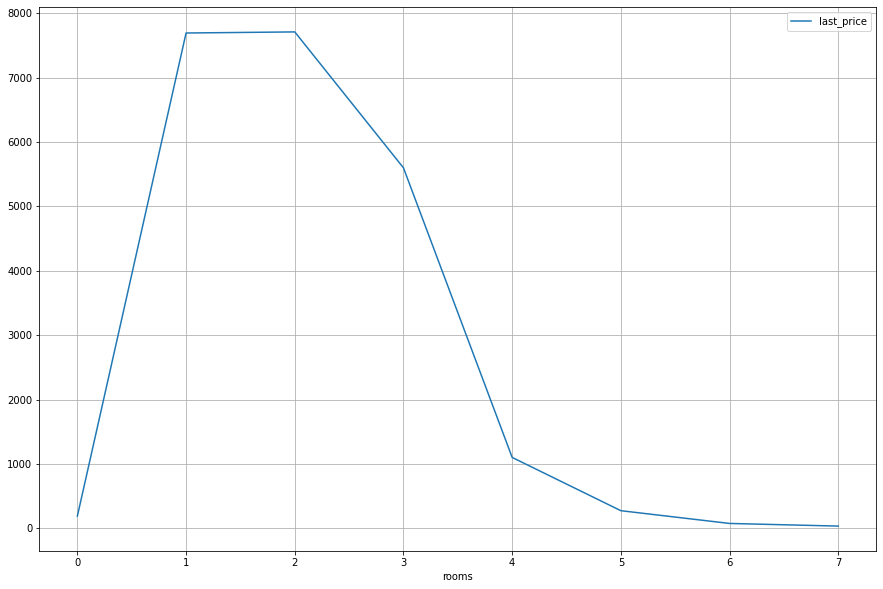

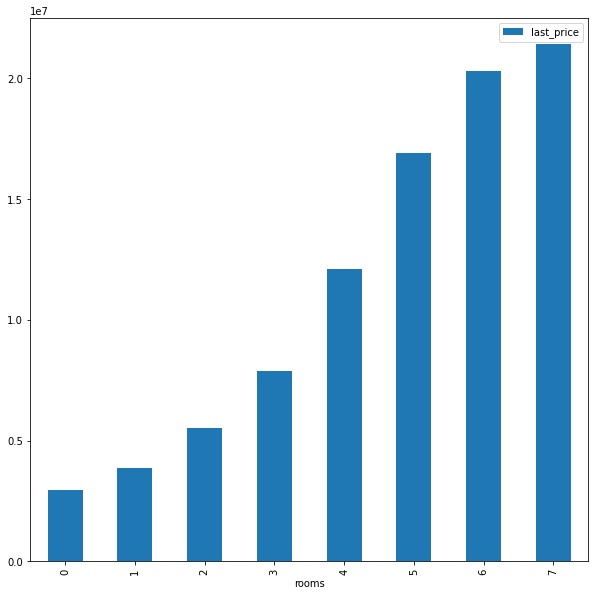

In [121]:
data.pivot_table(index='rooms', values='last_price', aggfunc='count').plot(grid=True, figsize=(15, 10));
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', figsize=(10,10), kind='bar');

Пик цены у однушек и двушек, далее с увеличением количества комнат относительная цена за комнату начинает падать.

#####  Этаж расположения

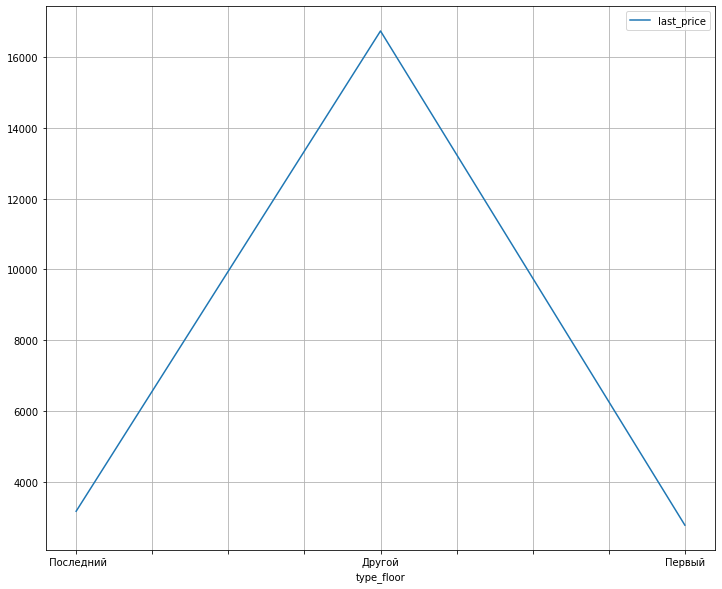

In [122]:
data.pivot_table(index='type_floor', values='last_price', aggfunc='count').plot(grid=True, figsize=(12, 10));

По графику видно, что самые дешевые квартиры на первом и последних этажах.

##### Дата размещения

###### День недели

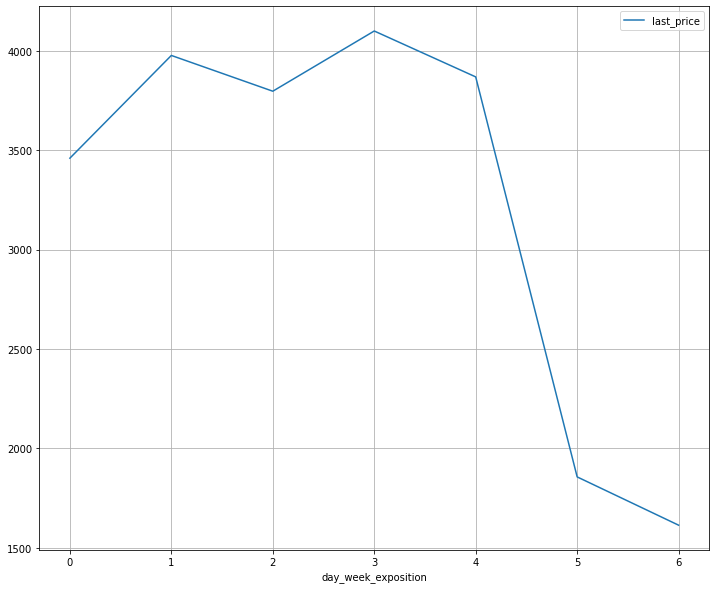

In [123]:
data.pivot_table(index='day_week_exposition', values='last_price', aggfunc='count').plot(grid=True, figsize=(12, 10));

Неожиданно, но объявления выложенные в субботу и воскресенье по цене ниже, чем выложенные в будни. Лично, для меня это удивительное открытие.

###### Месяц года

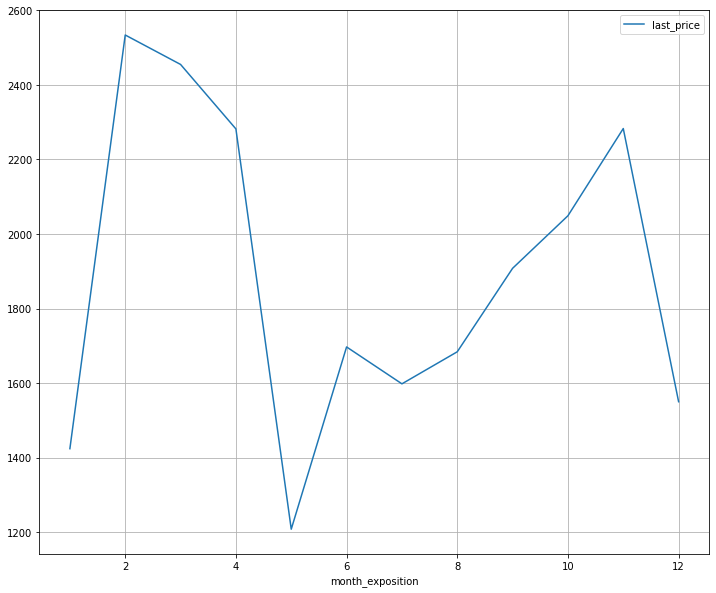

In [124]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='count').plot(grid=True, figsize=(12, 10));

Пик цен с февраля по апрель, сразу падающий в наинизшую точку цен в мае. Всё сходится с поведением графика количества выкладываемых объявлений. 

######  Год объявления

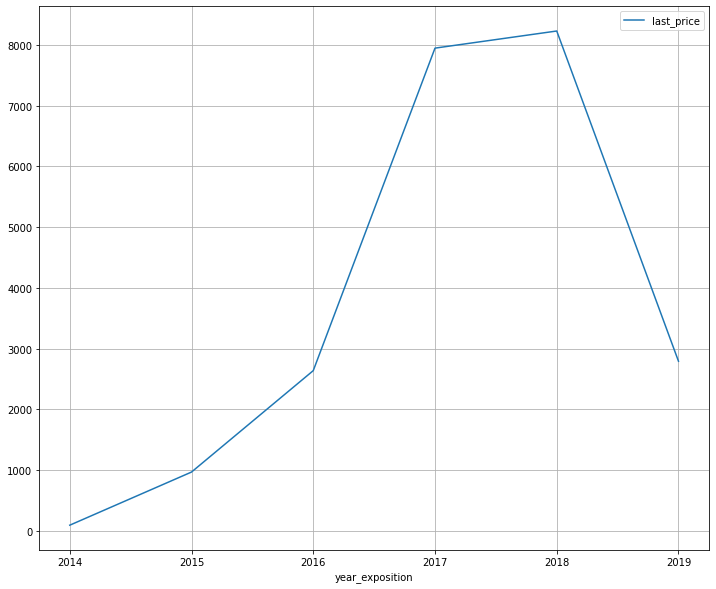

In [125]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc='count').plot(grid=True, figsize=(12, 10));

По графику видно, что с 14-го года цены только росли, а с 18-го произошел резкий спад. Ковид 19 виноват?

##### Корреляция параметров

In [126]:
list_for_graph = ['total_area',
                  'living_area',
                  'kitchen_area',
                  'rooms',
                  'type_floor_digit',
                  'day_week_exposition',
                  'month_exposition',
                  'year_exposition']

for entry in list_for_graph:
    correlation = data['last_price'].corr(data[entry])
    print(f'Корреляция между last_price и {entry} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 74.28%
Корреляция между last_price и living_area составляет: 62.98%
Корреляция между last_price и kitchen_area составляет: 52.43%
Корреляция между last_price и rooms составляет: 45.51%
Корреляция между last_price и type_floor_digit составляет: 5.05%
Корреляция между last_price и day_week_exposition составляет: -0.69%
Корреляция между last_price и month_exposition составляет: 0.71%
Корреляция между last_price и year_exposition составляет: -3.99%


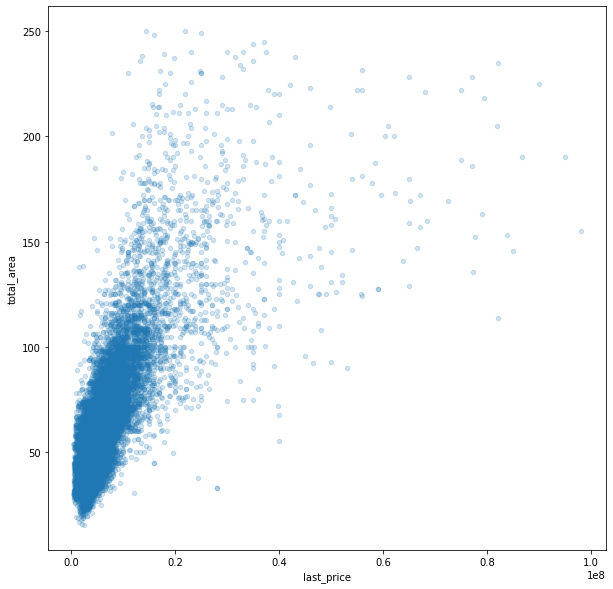

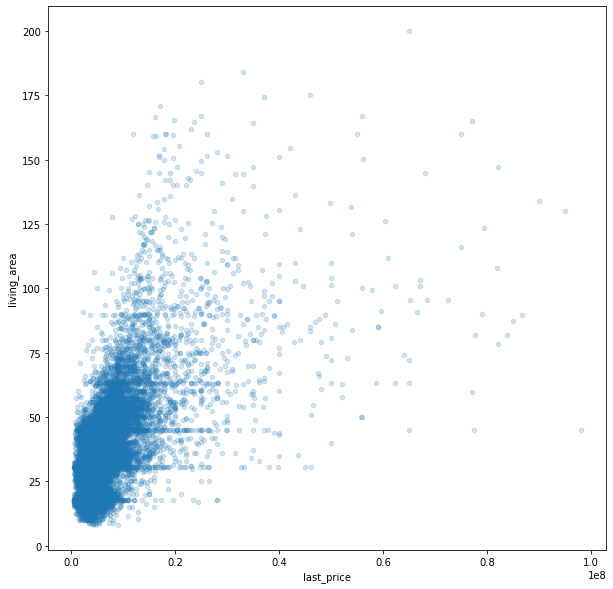

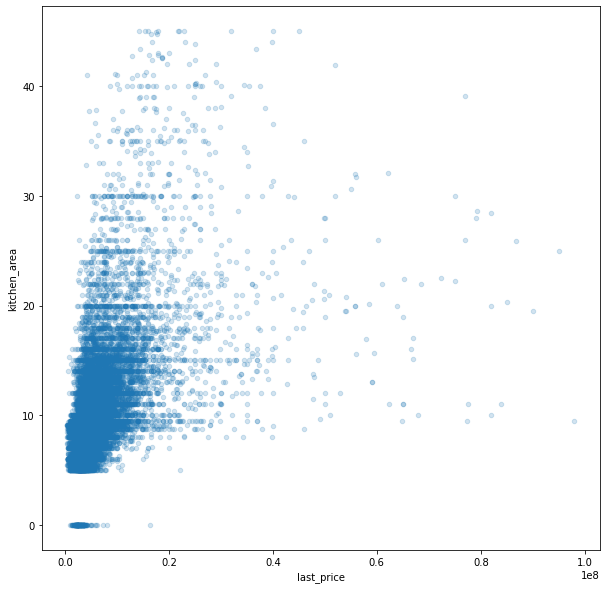

In [127]:
data.plot(x='last_price', y='total_area', kind='scatter', figsize=(10,10), alpha=0.2);
data.plot(x='last_price', y='living_area', kind='scatter', figsize=(10,10), alpha=0.2);
data.plot(x='last_price', y='kitchen_area', kind='scatter', figsize=(10,10), alpha=0.2);

In [128]:
print('Корреляция между общей площадью и ценой:', data['total_area'].corr(data['last_price']))
print('Корреляция между жилой площадью и ценой:', data['living_area'].corr(data['last_price']))
print('Корреляция между площадью кухни и ценой:', data['kitchen_area'].corr(data['last_price']))

Корреляция между общей площадью и ценой: 0.7427992294506319
Корреляция между жилой площадью и ценой: 0.6298299733074765
Корреляция между площадью кухни и ценой: 0.5242599346742216


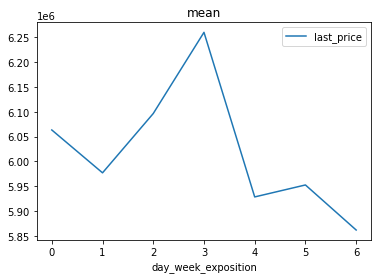

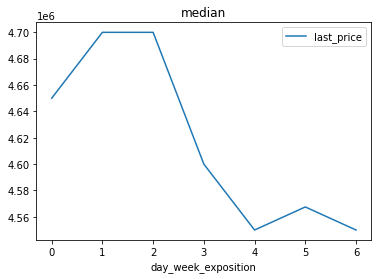

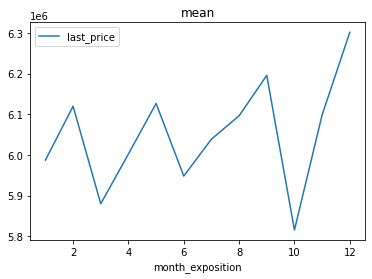

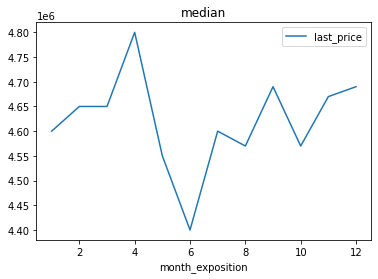

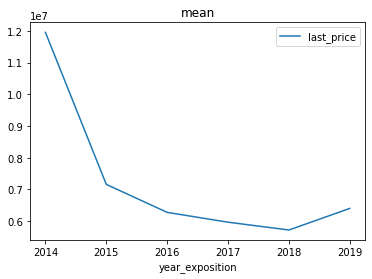

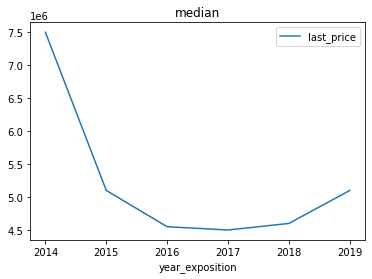

In [129]:
data.pivot_table(index='day_week_exposition',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='day_week_exposition',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='month_exposition',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='month_exposition',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

data.pivot_table(index='year_exposition',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
data.pivot_table(index='year_exposition',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');

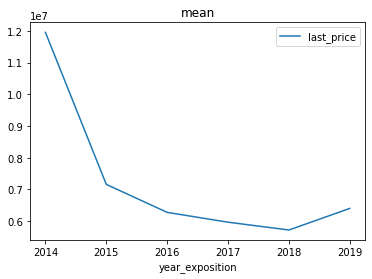

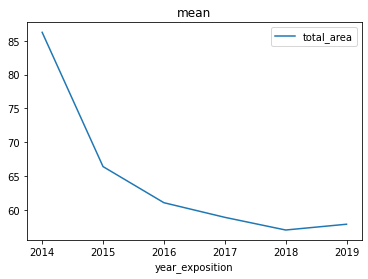

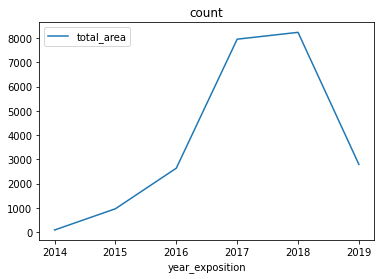

In [130]:
data.pivot_table(index='year_exposition',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');

data.pivot_table(index='year_exposition',values='total_area',aggfunc='mean').plot(y='total_area', kind='line', title='mean');
 
data.pivot_table(index='year_exposition',values='total_area',aggfunc='count').plot(y='total_area', kind='line', title='count');


Увеличение числа продавцов привела к снижению цены.

#### Цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [131]:
price = round(data.pivot_table(index='locality_name', values='price_sq_meter', aggfunc=['mean', 'count']), 2)
price.columns = ['price_sq_meter', 'count']
price.sort_values(by='count', ascending=False).head(10)

,price_sq_meter,count
locality_name,,
Санкт-Петербург,112817.50,15045
Мурино,85616.35,548
Кудрово,95054.31,443
Шушары,78164.11,431
Всеволожск,68742.60,387
Пушкин,103071.23,354
Колпино,75250.35,332
Парголово,90074.84,323
Гатчина,68800.73,297


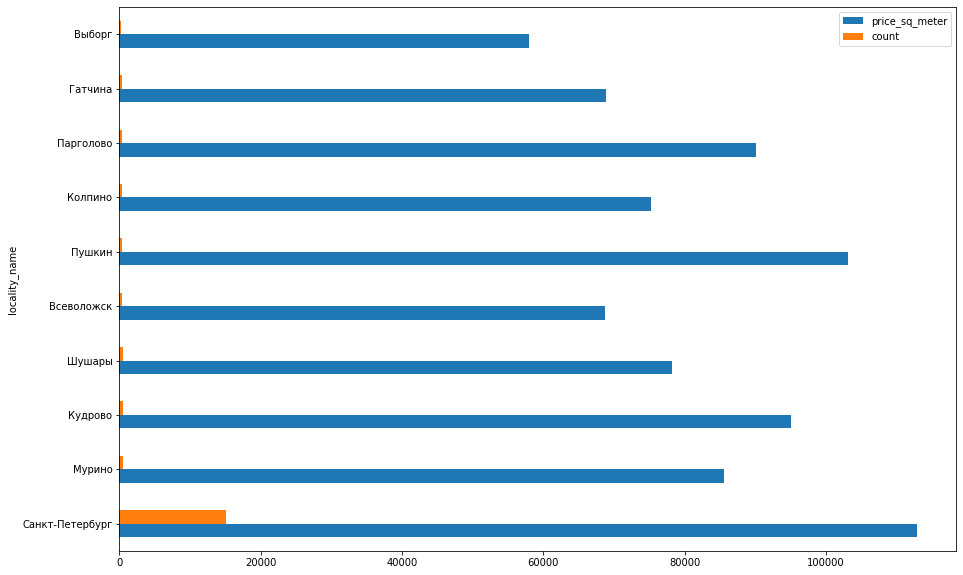

In [132]:
price.sort_values(by='count', ascending=False).head(10).plot(figsize=(15,10), kind='barh');

##### Населённые пункты с самой высокой ценой за квадратный метр

In [133]:
price.sort_values(by='price_sq_meter', ascending=False).head(10)

,price_sq_meter,count
locality_name,,
Зеленогорск,117140.89,22
Лисий Нос,113728.35,2
Санкт-Петербург,112817.50,15045
Репино,104238.61,4
Пушкин,103071.23,354
Сестрорецк,102340.29,178
Мистолово,98549.98,11
Левашово,96997.69,1
Кудрово,95054.31,443


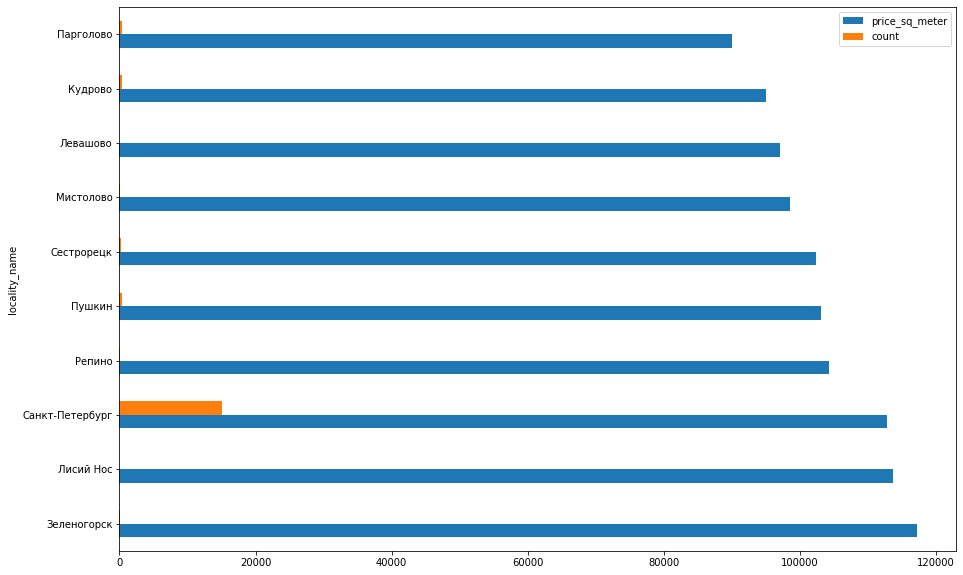

In [134]:
price.sort_values(by='price_sq_meter', ascending=False).head(10).plot(figsize=(15,10), kind='barh');

##### Населённые пункты с самой низкой ценой за квадратный метр

In [135]:
price.sort_values(by='price_sq_meter', ascending=True).head(10)

,price_sq_meter,count
locality_name,,
Старополье,11206.22,3
Свирь,11481.48,2
Выскатка,12335.48,2
Совхозный,12629.13,2
Малая Романовка,12724.55,1
Тёсово-4,12931.03,1
Ям-Тесово,13711.56,2
Житково,14956.28,2
Лужайка,15000.00,1


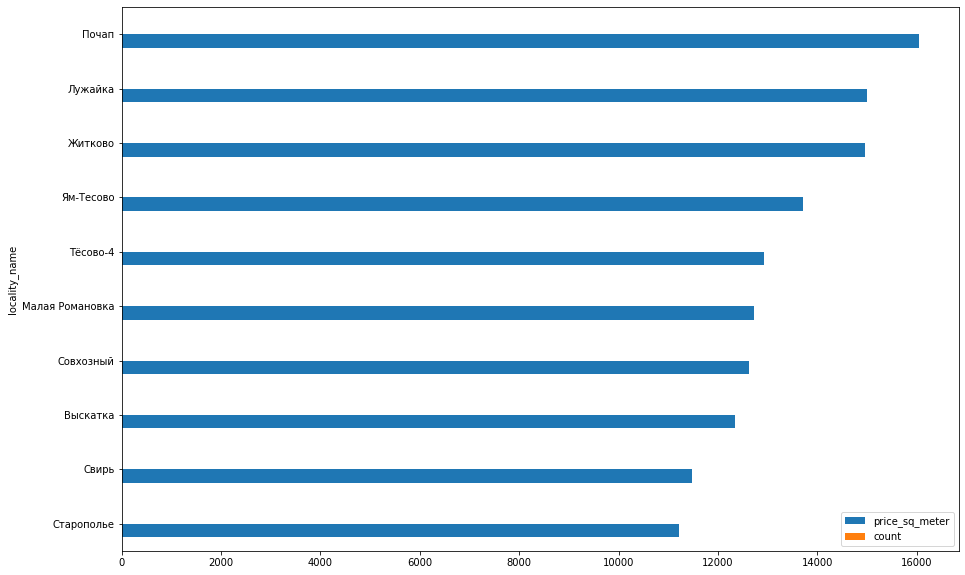

In [136]:
price.sort_values(by='price_sq_meter', ascending=True).head(10).plot(figsize=(15,10), kind='barh');

#### Зависимость средней цены квадратного метра от расстояния от центра города в Санкт-Петербурге

In [137]:
price_spb = (
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_to_center', values='price_sq_meter', aggfunc=['mean', 'count'])
)
price_spb.columns = ['price_sq_meter', 'count']
price_spb['price_sq_meter'] = round(price_spb['price_sq_meter'], 2)
price_spb.sort_values(by='distance_to_center', ascending=True).head(30)

,price_sq_meter,count
distance_to_center,,
0.0,217258.52,20
1.0,153028.38,173
2.0,145884.26,277
3.0,120132.76,327
4.0,127255.84,636
5.0,136556.29,831
6.0,143706.78,573
7.0,152190.51,402
8.0,123398.35,569


Однозначно, в самом центре и в радиусе 2 км самое дорогое жилье. Затем ужодит волнообразно с повышениями и понижениями с основным трендом на понижение. Чем дальше от центра, тем дешевле квадратный метр. Но на 27 км есть резкий скачок. Судя по всему на данном расстоянии есть какой то очень дорогой элитный поселок, который резко стягивает среднее значение в большую сторону, при это речь идет только о двух объктах.

In [138]:
data.query('locality_name == "Санкт-Петербург" and distance_to_center ==27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_sq_meter,day_week_exposition,month_exposition,year_exposition,type_floor,type_floor_digit,distance_to_center
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,0.0,505.0,128,193918.92,1,11,2017,Другой,1,27.0
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,False,...,0.0,505.0,178,70312.50,1,2,2018,Последний,2,27.0


То есть одна единственная "элитная" квартира с ценой за кв м более 190 тыс и малое количество объявлений так резко меняют картину. 

In [141]:
(data.query('distance_to_center == 3')
 .pivot_table(index='type_floor', values='cityCenters_nearest', aggfunc='count'))

,cityCenters_nearest
type_floor,
Последний,75
Другой,200
Первый,52


In [142]:
(data.query('distance_to_center == 5')
 .pivot_table(index='type_floor', values='cityCenters_nearest', aggfunc='count'))

,cityCenters_nearest
type_floor,
Последний,123
Другой,634
Первый,74


<AxesSubplot:xlabel='distance_to_center'>

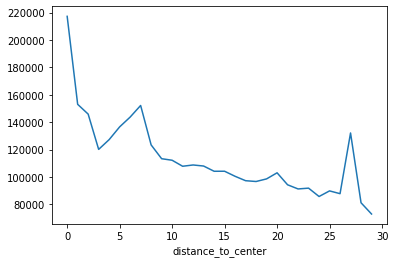

In [143]:
# check
price_spb.sort_values(by='distance_to_center', ascending=True).head(30)['price_sq_meter'].plot()

### Общий вывод

Нужно было научиться определять рыночную стоимость объектов недвижимости. Установить параметры, которые влияют на определение цены. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
На ценообразование квартиры в Питере(наверное не только там) влияют множество факторов-параметров. Такие как: общая площадь; жилая площадь; площадь кухни; количество комнат; этажа, на котором расположена квартира; расстояние до центра; а также день недели при публикации и месяц)
После изучения данных было выявлены и устранены аномалии в данных. В ходе исследования выявлена особенность, наличие в 27 км от центра цены за кв м больше чем в 8-ми км. При дальнейшем рассмотрении оказалось, что на данном расстоянии всего 2 объявления и одно из них элитное жилье с ценой за кв.м. более 190000, которое так искажает данные. 
Так же выявлена особенность в днях "висения объявления", где есть выбросы равные 45 и 60 дням, судя по всему связанное с автоматическим удалением их, по истечению срока.